# Notebook Set-up

In [7]:
!pip install pandas
!pip install matplotlib
!pip install kneed
!pip install nbimporter
!pip install html5lib
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.patches import Ellipse
import streamlit as st
import pandas as pd
from functions_utils import *
import plotly.express as px
from scipy.stats import zscore

pd.set_option('display.max_columns', None)

# Champions League Data

## Standard Stats

In [30]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/stats/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_standard')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

standard_stats_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(standard_stats_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    standard_stats_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in standard_stats_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    standard_stats_player_ucl.columns = [col.strip() for col in standard_stats_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
standard_stats_player_ucl = standard_stats_player_ucl.loc[:, ~standard_stats_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = standard_stats_player_ucl.columns.tolist()  # Get the header as a list
standard_stats_player_ucl = standard_stats_player_ucl[~standard_stats_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
standard_stats_player_ucl = standard_stats_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
standard_stats_player_ucl.columns = [col.lower().replace(' ', '_') for col in standard_stats_player_ucl.columns]
standard_stats_player_ucl = standard_stats_player_ucl[standard_stats_player_ucl['rk'].astype(str).str.upper() != 'RK']
standard_stats_player_ucl['nation'] = standard_stats_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
standard_stats_player_ucl['squad'] = standard_stats_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
standard_stats_player_ucl['age_rounded'] = standard_stats_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
standard_stats_player_ucl = standard_stats_player_ucl.drop(columns=['matches'])
standard_stats_player_ucl['player_id'] = (standard_stats_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   standard_stats_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   standard_stats_player_ucl['age'].astype(str).str.lower() + '_' +
                                   standard_stats_player_ucl['born'].astype(str).str.lower()
)

#standard_stats_player_ucl = standard_stats_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
standard_stats_player_ucl


C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\1608360125.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_g+a,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,expected_xg,expected_npxg,expected_xag,expected_npxg+xag,progression_prgc,progression_prgp,progression_prgr,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_g+a,per_90_minutes_g-pk,per_90_minutes_g+a-pk,per_90_minutes_xg,per_90_minutes_xag,per_90_minutes_xg+xag,per_90_minutes_npxg,per_90_minutes_npxg+xag,age_rounded,player_id
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,9,2,301,3.3,2,1,3,2,0,0,0,0,1.2,1.2,0.7,1.9,9,6,19,0.60,0.30,0.90,0.60,0.90,0.36,0.20,0.56,0.36,0.56,27,eng_milan_27-224_1997
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,8,7,680,7.6,1,1,2,1,0,0,1,0,0.5,0.5,0.6,1.2,2,9,3,0.13,0.13,0.26,0.13,0.26,0.07,0.09,0.16,0.07,0.16,37,ita_inter_37-093_1988
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,6,4,287,3.2,0,0,0,0,0,0,2,0,0.6,0.6,0.3,0.9,3,9,6,0.00,0.00,0.00,0.00,0.00,0.20,0.08,0.28,0.20,0.28,33,mkd_dinamo zagreb_33-350_1991
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,10,9,685,7.6,5,1,6,5,0,0,2,0,2.0,2.0,1.6,3.6,34,13,63,0.66,0.13,0.79,0.66,0.79,0.27,0.21,0.48,0.27,0.48,23,ger_dortmund_23-116_2002
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,5,2,210,2.3,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.3,4,9,16,0.00,0.00,0.00,0.00,0.00,0.08,0.07,0.15,0.08,0.15,25,mar_leverkusen_25-004_2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3,3,270,3.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3,3,0,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,22,fra_young boys_22-007_2003
917,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,8,7,532,5.9,2,1,3,2,0,0,0,0,1.3,1.3,1.0,2.3,11,20,31,0.34,0.17,0.51,0.34,0.51,0.22,0.17,0.40,0.22,0.40,28,ukr_shakhtar_28-284_1996
918,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,6,0,140,1.6,0,0,0,0,0,0,0,0,0.3,0.3,0.1,0.5,3,5,9,0.00,0.00,0.00,0.00,0.00,0.22,0.07,0.29,0.22,0.29,20,cro_sturm graz_20-006_2005
919,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,11,9,797,8.9,3,1,4,3,0,0,0,0,1.9,1.9,1.5,3.4,31,58,39,0.34,0.11,0.45,0.34,0.45,0.21,0.17,0.38,0.21,0.38,26,nor_arsenal_26-148_1998


In [31]:
player_min = standard_stats_player_ucl[['player_id','playing_time_min']]

## Goalkeeping

In [32]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/keepers/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_keeper')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

goalkeeping_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(goalkeeping_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    goalkeeping_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in goalkeeping_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    goalkeeping_player_ucl.columns = [col.strip() for col in goalkeeping_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
goalkeeping_player_ucl = goalkeeping_player_ucl.loc[:, ~goalkeeping_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = goalkeeping_player_ucl.columns.tolist()  # Get the header as a list
goalkeeping_player_ucl = goalkeeping_player_ucl[~goalkeeping_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
goalkeeping_player_ucl = goalkeeping_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
goalkeeping_player_ucl.columns = [col.lower().replace(' ', '_') for col in goalkeeping_player_ucl.columns]
goalkeeping_player_ucl = goalkeeping_player_ucl[goalkeeping_player_ucl['rk'].astype(str).str.upper() != 'RK']
goalkeeping_player_ucl['nation'] = goalkeeping_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goalkeeping_player_ucl['squad'] = goalkeeping_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goalkeeping_player_ucl['age_rounded'] = goalkeeping_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
goalkeeping_player_ucl = goalkeeping_player_ucl.drop(columns=['matches'])
goalkeeping_player_ucl['player_id'] = (goalkeeping_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_ucl['age'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_ucl['born'].astype(str).str.lower()
)

#goalkeeping_player_ucl = goalkeeping_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
goalkeeping_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\1759493844.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_ga,performance_ga90,performance_sota,performance_saves,performance_save%,performance_w,performance_d,performance_l,performance_cs,performance_cs%,penalty_kicks_pkatt,penalty_kicks_pka,penalty_kicks_pksv,penalty_kicks_pkm,penalty_kicks_save%,age_rounded,player_id
0,1,Alisson,BRA,GK,Liverpool,32-224,1992,6,6,570,6.3,3,0.47,27,24,88.9,5,0,1,3,50.0,0,0,0,0,NaN,32,bra_liverpool_32-224_1992
1,2,David von Ballmoos,SUI,GK,Young Boys,30-135,1994,4,4,360,4.0,15,3.75,29,13,48.3,0,0,4,0,0.0,1,0,1,0,100.0,30,sui_young boys_30-135_1994
2,3,Walter Benítez,ARG,GK,PSV Eindhoven,32-115,1993,11,11,1020,11.3,21,1.85,59,38,66.1,5,3,3,1,9.1,1,1,0,0,0.0,32,arg_psv eindhoven_32-115_1993
3,4,Justin Bijlow,NED,GK,Feyenoord,27-112,1998,2,2,125,1.4,1,0.72,8,7,87.5,1,0,1,1,50.0,0,0,0,0,NaN,27,ned_feyenoord_27-112_1998
4,5,Marco Bizot,NED,GK,Brest,34-065,1991,9,9,810,9.0,14,1.56,43,30,74.4,4,1,4,2,22.2,3,3,0,0,0.0,34,ned_brest_34-065_1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,63,Jonas Urbig,GER,GK,Bayern Munich,21-279,2003,4,3,303,3.4,4,1.19,12,8,66.7,1,1,1,2,66.7,0,0,0,0,NaN,21,ger_bayern munich_21-279_2003
65,64,Maarten Vandevoordt,BEL,GK,RB Leipzig,23-077,2002,2,2,180,2.0,2,1.00,7,5,71.4,1,0,1,0,0.0,0,0,0,0,NaN,23,bel_rb leipzig_23-077_2002
66,65,Peter Vindahl Jensen,DEN,GK,Sparta Prague,27-087,1998,8,8,720,8.0,21,2.62,61,41,67.2,1,1,6,1,12.5,1,1,0,0,0.0,27,den_sparta prague_27-087_1998
67,66,Timon Wellenreuther,GER,GK,Feyenoord,29-162,1995,11,10,955,10.6,25,2.36,63,40,63.5,4,2,4,1,10.0,5,2,2,1,50.0,29,ger_feyenoord_29-162_1995


## Advanced Goalkeeping

In [33]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/keepersadv/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_keeper_adv')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

adv_goalkeeping_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(adv_goalkeeping_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    adv_goalkeeping_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in adv_goalkeeping_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    adv_goalkeeping_player_ucl.columns = [col.strip() for col in adv_goalkeeping_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
adv_goalkeeping_player_ucl = adv_goalkeeping_player_ucl.loc[:, ~adv_goalkeeping_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = adv_goalkeeping_player_ucl.columns.tolist()  # Get the header as a list
adv_goalkeeping_player_ucl = adv_goalkeeping_player_ucl[~adv_goalkeeping_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
adv_goalkeeping_player_ucl = adv_goalkeeping_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
adv_goalkeeping_player_ucl.columns = [col.lower().replace(' ', '_') for col in adv_goalkeeping_player_ucl.columns]
adv_goalkeeping_player_ucl = adv_goalkeeping_player_ucl[adv_goalkeeping_player_ucl['rk'].astype(str).str.upper() != 'RK']
adv_goalkeeping_player_ucl['nation'] = adv_goalkeeping_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
adv_goalkeeping_player_ucl['squad'] = adv_goalkeeping_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
adv_goalkeeping_player_ucl['age_rounded'] = adv_goalkeeping_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
adv_goalkeeping_player_ucl = adv_goalkeeping_player_ucl.drop(columns=['matches'])
adv_goalkeeping_player_ucl['player_id'] = (adv_goalkeeping_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_ucl['age'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_ucl['born'].astype(str).str.lower()
)

adv_goalkeeping_player_ucl = adv_goalkeeping_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
adv_goalkeeping_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\220836081.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,goals_ga,goals_pka,goals_fk,goals_ck,goals_og,expected_psxg,expected_psxg/sot,expected_psxg+/-,expected_/90,launched_cmp,launched_att,launched_cmp%,passes_att_(gk),passes_thr,passes_launch%,passes_avglen,goal_kicks_att,goal_kicks_launch%,goal_kicks_avglen,crosses_opp,crosses_stp,crosses_stp%,sweeper_#opa,sweeper_#opa/90,sweeper_avgdist,age_rounded,player_id,playing_time_min
0,1,Alisson,BRA,GK,Liverpool,32-224,1992,6.3,3,0,0,0,0,6.6,0.24,+3.6,+0.60,34,87,39.1,222,25,34.7,32.4,21,47.6,42.2,63,4,6.3,7,1.17,14.0,32,bra_liverpool_32-224_1992,570
1,2,David von Ballmoos,SUI,GK,Young Boys,30-135,1994,4.0,15,0,0,2,0,9.5,0.30,-5.5,-1.38,23,67,34.3,127,9,43.3,36.4,23,52.2,46.3,59,1,1.7,4,1.00,16.2,30,sui_young boys_30-135_1994,360
2,3,Walter Benítez,ARG,GK,PSV Eindhoven,32-115,1993,11.3,21,1,0,2,0,19.1,0.31,-1.9,-0.18,66,149,44.3,400,49,28.5,31.2,61,57.4,44.5,147,13,8.8,11,1.00,12.4,32,arg_psv eindhoven_32-115_1993,1020
3,4,Justin Bijlow,NED,GK,Feyenoord,27-112,1998,1.4,1,0,0,0,0,2.8,0.35,+1.8,+1.31,9,29,31.0,39,2,43.6,39.7,18,66.7,54.3,40,3,7.5,0,0.00,7.0,27,ned_feyenoord_27-112_1998,125
4,5,Marco Bizot,NED,GK,Brest,34-065,1991,9.0,14,3,0,0,1,13.7,0.27,+0.7,+0.08,80,174,46.0,232,33,62.9,44.6,38,73.7,53.4,111,11,9.9,16,1.78,15.2,34,ned_brest_34-065_1991,810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,Jonas Urbig,GER,GK,Bayern Munich,21-279,2003,3.4,4,0,0,2,0,3.1,0.26,-0.9,-0.28,10,47,21.3,113,8,38.1,37.2,4,100.0,60.8,42,0,0.0,6,1.78,17.0,21,ger_bayern munich_21-279_2003,303
63,64,Maarten Vandevoordt,BEL,GK,RB Leipzig,23-077,2002,2.0,2,0,0,1,0,1.5,0.26,-0.5,-0.25,4,14,28.6,53,7,20.8,26.9,12,25.0,33.2,24,1,4.2,5,2.50,21.1,23,bel_rb leipzig_23-077_2002,180
64,65,Peter Vindahl Jensen,DEN,GK,Sparta Prague,27-087,1998,8.0,21,1,1,4,1,17.0,0.26,-3.0,-0.38,42,148,28.4,243,38,44.0,37.9,52,78.8,55.2,120,7,5.8,7,0.88,11.4,27,den_sparta prague_27-087_1998,720
65,66,Timon Wellenreuther,GER,GK,Feyenoord,29-162,1995,10.6,25,2,0,5,4,23.5,0.33,+2.5,+0.23,39,127,30.7,398,43,28.6,32.2,32,40.6,39.8,134,8,6.0,8,0.75,11.8,29,ger_feyenoord_29-162_1995,955


## Shooting

In [34]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/shooting/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_shooting')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

shooting_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(shooting_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    shooting_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in shooting_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    shooting_player_ucl.columns = [col.strip() for col in shooting_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
shooting_player_ucl = shooting_player_ucl.loc[:, ~shooting_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = shooting_player_ucl.columns.tolist()  # Get the header as a list
shooting_player_ucl = shooting_player_ucl[~shooting_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
shooting_player_ucl = shooting_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
shooting_player_ucl.columns = [col.lower().replace(' ', '_') for col in shooting_player_ucl.columns]
shooting_player_ucl = shooting_player_ucl[shooting_player_ucl['rk'].astype(str).str.upper() != 'RK']
shooting_player_ucl['nation'] = shooting_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
shooting_player_ucl['squad'] = shooting_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
shooting_player_ucl['age_rounded'] = shooting_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
shooting_player_ucl = shooting_player_ucl.drop(columns=['matches'])
shooting_player_ucl['player_id'] = (shooting_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   shooting_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   shooting_player_ucl['age'].astype(str).str.lower() + '_' +
                                   shooting_player_ucl['born'].astype(str).str.lower()
)

shooting_player_ucl = shooting_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
shooting_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\3118609871.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg,age_rounded,player_id,playing_time_min
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,3.3,2,8,4,50.0,2.39,1.20,0.25,0.50,12.5,1,0,0,1.2,1.2,0.15,+0.8,+0.8,27,eng_milan_27-224_1997,301
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,7.6,1,4,2,50.0,0.53,0.26,0.25,0.50,10.0,0,0,0,0.5,0.5,0.13,+0.5,+0.5,37,ita_inter_37-093_1988,680
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,3.2,0,6,1,16.7,1.88,0.31,0.00,0.00,14.6,0,0,0,0.6,0.6,0.11,-0.6,-0.6,33,mkd_dinamo zagreb_33-350_1991,287
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,7.6,5,24,11,45.8,3.15,1.45,0.21,0.45,17.5,0,0,0,2.0,2.0,0.08,+3.0,+3.0,23,ger_dortmund_23-116_2002,685
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,2.3,0,2,2,100.0,0.86,0.86,0.00,0.00,16.3,0,0,0,0.2,0.2,0.09,-0.2,-0.2,25,mar_leverkusen_25-004_2000,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,22,fra_young boys_22-007_2003,270
882,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,5.9,2,12,5,41.7,2.03,0.85,0.17,0.40,18.1,0,0,0,1.3,1.3,0.11,+0.7,+0.7,28,ukr_shakhtar_28-284_1996,532
883,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,1.6,0,4,1,25.0,2.57,0.64,0.00,0.00,19.7,0,0,0,0.3,0.3,0.09,-0.3,-0.3,20,cro_sturm graz_20-006_2005,140
884,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,8.9,3,12,5,41.7,1.36,0.56,0.25,0.60,16.5,0,0,0,1.9,1.9,0.16,+1.1,+1.1,26,nor_arsenal_26-148_1998,797


## Passing

In [35]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/passing/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_passing')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

passing_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(passing_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    passing_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in passing_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    passing_player_ucl.columns = [col.strip() for col in passing_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
passing_player_ucl = passing_player_ucl.loc[:, ~passing_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = passing_player_ucl.columns.tolist()  # Get the header as a list
passing_player_ucl = passing_player_ucl[~passing_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
passing_player_ucl = passing_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
passing_player_ucl.columns = [col.lower().replace(' ', '_') for col in passing_player_ucl.columns]
passing_player_ucl = passing_player_ucl[passing_player_ucl['rk'].astype(str).str.upper() != 'RK']
passing_player_ucl['nation'] = passing_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
passing_player_ucl['squad'] = passing_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
passing_player_ucl['age_rounded'] = passing_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
passing_player_ucl = passing_player_ucl.drop(columns=['matches'])
passing_player_ucl['player_id'] = (passing_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   passing_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   passing_player_ucl['age'].astype(str).str.lower() + '_' +
                                   passing_player_ucl['born'].astype(str).str.lower()
)

passing_player_ucl = passing_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
passing_player_ucl


C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\1251190252.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xag,expected_xa,expected_a-xag,kp,1/3,ppa,crspa,prgp,age_rounded,player_id,playing_time_min
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,3.3,33,50,66.0,377,115,25,30,83.3,4,9,44.4,1,4,25.0,1,0.7,0.4,+0.3,4,2,0,0,6,27,eng_milan_27-224_1997,301
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,7.6,284,318,89.3,5162,1565,104,112,92.9,158,170,92.9,19,28,67.9,1,0.6,0.0,+0.4,3,5,0,0,9,37,ita_inter_37-093_1988,680
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,3.2,84,96,87.5,1161,336,50,55,90.9,28,31,90.3,2,6,33.3,0,0.3,0.1,-0.3,2,6,0,0,9,33,mkd_dinamo zagreb_33-350_1991,287
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,7.6,143,208,68.8,2086,449,80,106,75.5,49,56,87.5,8,17,47.1,1,1.6,0.4,-0.6,9,6,6,2,13,23,ger_dortmund_23-116_2002,685
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,2.3,65,84,77.4,893,220,41,51,80.4,19,24,79.2,3,4,75.0,0,0.2,0.3,-0.2,3,2,4,1,9,25,mar_leverkusen_25-004_2000,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3.0,112,133,84.2,2134,833,40,42,95.2,61,70,87.1,10,16,62.5,0,0.0,0.0,0.0,1,9,0,0,3,22,fra_young boys_22-007_2003,270
882,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,5.9,139,203,68.5,2391,824,64,78,82.1,53,70,75.7,15,35,42.9,1,1.0,1.4,0.0,8,13,9,3,20,28,ukr_shakhtar_28-284_1996,532
883,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,1.6,36,43,83.7,548,138,16,18,88.9,16,19,84.2,3,4,75.0,0,0.1,0.1,-0.1,3,2,1,0,5,20,cro_sturm graz_20-006_2005,140
884,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,8.9,353,421,83.8,5729,1571,179,199,89.9,145,164,88.4,23,36,63.9,1,1.5,2.2,-0.5,19,28,13,2,58,26,nor_arsenal_26-148_1998,797


## pass types

In [36]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/passing_types/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_passing_types')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

pass_types_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(pass_types_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    pass_types_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in pass_types_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    pass_types_player_ucl.columns = [col.strip() for col in pass_types_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
pass_types_player_ucl = pass_types_player_ucl.loc[:, ~pass_types_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = pass_types_player_ucl.columns.tolist()  # Get the header as a list
pass_types_player_ucl = pass_types_player_ucl[~pass_types_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
pass_types_player_ucl = pass_types_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
pass_types_player_ucl.columns = [col.lower().replace(' ', '_') for col in pass_types_player_ucl.columns]
pass_types_player_ucl = pass_types_player_ucl[pass_types_player_ucl['rk'].astype(str).str.upper() != 'RK']
pass_types_player_ucl['nation'] = pass_types_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
pass_types_player_ucl['squad'] = pass_types_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
pass_types_player_ucl['age_rounded'] = pass_types_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
pass_types_player_ucl = pass_types_player_ucl.drop(columns=['matches'])
pass_types_player_ucl['player_id'] = (pass_types_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   pass_types_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   pass_types_player_ucl['age'].astype(str).str.lower() + '_' +
                                   pass_types_player_ucl['born'].astype(str).str.lower()
)

pass_types_player_ucl = pass_types_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
pass_types_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\4259614930.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,att,pass_types_live,pass_types_dead,pass_types_fk,pass_types_tb,pass_types_sw,pass_types_crs,pass_types_ti,pass_types_ck,corner_kicks_in,corner_kicks_out,corner_kicks_str,outcomes_cmp,outcomes_off,outcomes_blocks,age_rounded,player_id,playing_time_min
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,3.3,50,43,7,2,1,1,2,0,0,0,0,0,33,0,1,27,eng_milan_27-224_1997,301
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,7.6,318,296,19,11,0,1,1,0,0,0,0,0,284,3,0,37,ita_inter_37-093_1988,680
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,3.2,96,94,2,1,0,0,2,0,0,0,0,0,84,0,0,33,mkd_dinamo zagreb_33-350_1991,287
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,7.6,208,206,2,0,1,2,11,2,0,0,0,0,143,0,12,23,ger_dortmund_23-116_2002,685
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,2.3,84,81,3,1,0,0,4,0,1,0,0,0,65,0,1,25,mar_leverkusen_25-004_2000,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3.0,133,123,10,2,0,3,0,0,0,0,0,0,112,0,3,22,fra_young boys_22-007_2003,270
882,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,5.9,203,184,18,6,6,3,21,3,9,6,0,0,139,1,6,28,ukr_shakhtar_28-284_1996,532
883,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,1.6,43,42,1,0,0,0,1,0,0,0,0,0,36,0,1,20,cro_sturm graz_20-006_2005,140
884,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,8.9,421,379,39,15,11,0,27,2,12,12,0,0,353,3,8,26,nor_arsenal_26-148_1998,797


## Goal and Shot Creation

In [37]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/gca/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_gca')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

goal_shot_creation_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(goal_shot_creation_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    goal_shot_creation_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in goal_shot_creation_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    goal_shot_creation_player_ucl.columns = [col.strip() for col in goal_shot_creation_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
goal_shot_creation_player_ucl = goal_shot_creation_player_ucl.loc[:, ~goal_shot_creation_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = goal_shot_creation_player_ucl.columns.tolist()  # Get the header as a list
goal_shot_creation_player_ucl = goal_shot_creation_player_ucl[~goal_shot_creation_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
goal_shot_creation_player_ucl = goal_shot_creation_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
goal_shot_creation_player_ucl.columns = [col.lower().replace(' ', '_') for col in goal_shot_creation_player_ucl.columns]
goal_shot_creation_player_ucl = goal_shot_creation_player_ucl[goal_shot_creation_player_ucl['rk'].astype(str).str.upper() != 'RK']
goal_shot_creation_player_ucl['nation'] = goal_shot_creation_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goal_shot_creation_player_ucl['squad'] = goal_shot_creation_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goal_shot_creation_player_ucl['age_rounded'] = goal_shot_creation_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
goal_shot_creation_player_ucl = goal_shot_creation_player_ucl.drop(columns=['matches'])
goal_shot_creation_player_ucl['player_id'] = (goal_shot_creation_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_ucl['age'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_ucl['born'].astype(str).str.lower()
)

goal_shot_creation_player_ucl = goal_shot_creation_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
goal_shot_creation_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\3652930870.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def,age_rounded,player_id,playing_time_min
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,3.3,7,2.09,3,0,1,1,2,0,2,0.60,1,0,1,0,0,0,27,eng_milan_27-224_1997,301
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,7.6,4,0.55,3,0,0,1,0,0,1,0.14,1,0,0,0,0,0,37,ita_inter_37-093_1988,680
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,3.2,4,1.25,3,0,0,1,0,0,1,0.31,1,0,0,0,0,0,33,mkd_dinamo zagreb_33-350_1991,287
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,7.6,28,3.68,17,0,4,3,2,2,6,0.79,2,0,1,1,1,1,23,ger_dortmund_23-116_2002,685
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,2.3,5,2.14,4,0,1,0,0,0,0,0.00,0,0,0,0,0,0,25,mar_leverkusen_25-004_2000,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3.0,2,0.67,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,22,fra_young boys_22-007_2003,270
882,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,5.9,16,2.71,13,1,0,1,0,1,2,0.34,2,0,0,0,0,0,28,ukr_shakhtar_28-284_1996,532
883,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,1.6,7,4.50,5,0,2,0,0,0,0,0.00,0,0,0,0,0,0,20,cro_sturm graz_20-006_2005,140
884,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,8.9,40,4.52,25,8,3,1,1,2,6,0.68,4,0,1,0,1,0,26,nor_arsenal_26-148_1998,797


## Defensive Actions

In [38]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/defense/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_defense')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

defence_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(defence_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    defence_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in defence_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    defence_player_ucl.columns = [col.strip() for col in defence_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
defence_player_ucl = defence_player_ucl.loc[:, ~defence_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = defence_player_ucl.columns.tolist()  # Get the header as a list
defence_player_ucl = defence_player_ucl[~defence_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
defence_player_ucl = defence_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
defence_player_ucl.columns = [col.lower().replace(' ', '_') for col in defence_player_ucl.columns]
defence_player_ucl = defence_player_ucl[defence_player_ucl['rk'].astype(str).str.upper() != 'RK']
defence_player_ucl['nation'] = defence_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
defence_player_ucl['squad'] = defence_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
defence_player_ucl['age_rounded'] = defence_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
defence_player_ucl = defence_player_ucl.drop(columns=['matches'])
defence_player_ucl['player_id'] = (defence_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   defence_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   defence_player_ucl['age'].astype(str).str.lower() + '_' +
                                   defence_player_ucl['born'].astype(str).str.lower()
)

defence_player_ucl = defence_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
defence_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\854990337.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl%,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tkl+int,clr,err,age_rounded,player_id,playing_time_min
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,3.3,3,1,2,0,1,0,1,0.0,1,2,1,1,2,5,3,0,27,eng_milan_27-224_1997,301
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,7.6,6,4,6,0,0,3,5,60.0,2,10,6,4,10,16,48,0,37,ita_inter_37-093_1988,680
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,3.2,3,2,1,0,2,0,2,0.0,2,3,2,1,4,7,5,0,33,mkd_dinamo zagreb_33-350_1991,287
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,7.6,16,11,5,7,4,7,11,63.6,4,6,0,6,8,24,1,0,23,ger_dortmund_23-116_2002,685
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,2.3,3,2,1,0,2,2,8,25.0,6,2,1,1,0,3,3,0,25,mar_leverkusen_25-004_2000,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3.0,4,2,3,1,0,3,3,100.0,0,4,3,1,6,10,15,0,22,fra_young boys_22-007_2003,270
882,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,5.9,9,9,6,2,1,3,9,33.3,6,5,2,3,4,13,6,0,28,ukr_shakhtar_28-284_1996,532
883,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,1.6,0,0,0,0,0,0,2,0.0,2,1,0,1,1,1,1,0,20,cro_sturm graz_20-006_2005,140
884,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,8.9,7,4,1,2,4,4,9,44.4,5,4,0,4,3,10,1,0,26,nor_arsenal_26-148_1998,797


## Possession

In [39]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/possession/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_possession')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

possession_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(possession_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    possession_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in possession_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    possession_player_ucl.columns = [col.strip() for col in possession_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
possession_player_ucl = possession_player_ucl.loc[:, ~possession_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = possession_player_ucl.columns.tolist()  # Get the header as a list
possession_player_ucl = possession_player_ucl[~possession_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
possession_player_ucl = possession_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
possession_player_ucl.columns = [col.lower().replace(' ', '_') for col in possession_player_ucl.columns]
possession_player_ucl = possession_player_ucl[possession_player_ucl['rk'].astype(str).str.upper() != 'RK']
possession_player_ucl['nation'] = possession_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
possession_player_ucl['squad'] = possession_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
possession_player_ucl['age_rounded'] = possession_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
possession_player_ucl = possession_player_ucl.drop(columns=['matches'])
possession_player_ucl['player_id'] = (possession_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   possession_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   possession_player_ucl['age'].astype(str).str.lower() + '_' +
                                   possession_player_ucl['born'].astype(str).str.lower()
)

possession_player_ucl = possession_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
possession_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\1592037852.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,take-ons_att,take-ons_succ,take-ons_succ%,take-ons_tkld,take-ons_tkld%,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr,age_rounded,player_id,playing_time_min
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,3.3,86,5,12,28,48,22,86,9,4,44.4,1,11.1,46,262,151,9,5,3,3,3,53,19,27,eng_milan_27-224_1997,301
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,7.6,402,85,277,108,20,5,402,1,0,0.0,1,100.0,217,921,364,2,1,0,2,0,242,3,37,ita_inter_37-093_1988,680
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,3.2,132,8,29,67,36,12,132,4,3,75.0,1,25.0,64,362,170,3,3,1,8,4,82,6,33,mkd_dinamo zagreb_33-350_1991,287
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,7.6,310,4,36,100,180,44,310,33,16,48.5,13,39.4,205,1446,841,34,15,15,13,10,212,63,23,ger_dortmund_23-116_2002,685
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,2.3,107,3,16,43,48,7,107,3,2,66.7,1,33.3,49,209,114,4,1,2,6,4,79,16,25,mar_leverkusen_25-004_2000,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3.0,167,48,112,54,1,0,167,1,1,100.0,0,0.0,101,450,289,3,1,0,2,1,109,0,22,fra_young boys_22-007_2003,270
882,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,5.9,270,10,58,107,107,19,270,16,6,37.5,9,56.3,151,871,382,11,3,3,12,9,174,31,28,ukr_shakhtar_28-284_1996,532
883,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,1.6,60,2,5,31,25,6,60,7,4,57.1,2,28.6,42,191,114,3,2,1,5,1,49,9,20,cro_sturm graz_20-006_2005,140
884,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,8.9,486,2,33,210,248,31,486,25,8,32.0,16,64.0,306,2005,1125,31,27,14,13,5,370,39,26,nor_arsenal_26-148_1998,797


## playing time

In [40]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/playingtime/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_playing_time')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

playing_time_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(playing_time_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    playing_time_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in playing_time_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    playing_time_player_ucl.columns = [col.strip() for col in playing_time_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
playing_time_player_ucl = playing_time_player_ucl.loc[:, ~playing_time_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = playing_time_player_ucl.columns.tolist()  # Get the header as a list
playing_time_player_ucl = playing_time_player_ucl[~playing_time_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
playing_time_player_ucl = playing_time_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
playing_time_player_ucl.columns = [col.lower().replace(' ', '_') for col in playing_time_player_ucl.columns]
playing_time_player_ucl = playing_time_player_ucl[playing_time_player_ucl['rk'].astype(str).str.upper() != 'RK']
playing_time_player_ucl['nation'] = playing_time_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
playing_time_player_ucl['squad'] = playing_time_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
playing_time_player_ucl['age_rounded'] = playing_time_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
playing_time_player_ucl = playing_time_player_ucl.drop(columns=['matches'])
playing_time_player_ucl['player_id'] = (playing_time_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   playing_time_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   playing_time_player_ucl['age'].astype(str).str.lower() + '_' +
                                   playing_time_player_ucl['born'].astype(str).str.lower()
)

#playing_time_player_ucl = playing_time_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
playing_time_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\779135437.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_min,playing_time_mn/mp,playing_time_min%,playing_time_90s,starts_starts,starts_mn/start,starts_compl,subs_subs,subs_mn/sub,subs_unsub,team_success_ppm,team_success_ong,team_success_onga,team_success_+/-,team_success_+/-90,team_success_on-off,team_success_(xg)_onxg,team_success_(xg)_onxga,team_success_(xg)_xg+/-,team_success_(xg)_xg+/-90,team_success_(xg)_on-off,age_rounded,player_id
0,1,Tay Abed,ISR,MF,PSV Eindhoven,21-067,2004,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,isr_psv eindhoven_21-067_2004
1,2,Tammy Abraham,ENG,FW,Milan,27-224,1997,9,301,33,33.4,3.3,2,72,0,7,22,0,1.44,6,3,+3,+0.90,+1.05,5.7,4.9,+0.8,+0.23,+0.33,27,eng_milan_27-224_1997
2,3,Francesco Acerbi,ITA,DF,Inter,37-093,1988,8,680,85,52.7,7.6,7,93,6,1,27,1,2.25,17,10,+7,+0.93,-0.25,11.5,12.2,-0.8,-0.11,-1.16,37,ita_inter_37-093_1988
3,4,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,6,287,48,39.9,3.2,4,62,0,2,20,0,1.67,5,4,+1,+0.31,+1.98,3.5,3.5,-0.1,-0.03,+1.90,33,mkd_dinamo zagreb_33-350_1991
4,5,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,10,685,69,54.4,7.6,9,73,1,1,27,1,2.00,18,8,+10,+1.31,+1.00,15.8,8.3,+7.5,+0.98,+0.80,23,ger_dortmund_23-116_2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,1109,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,6,140,23,19.4,1.6,0,NaN,0,6,23,1,0.50,0,3,-3,-1.93,-1.00,1.0,5.1,-4.1,-2.66,-1.76,20,cro_sturm graz_20-006_2005
1153,1110,Oliwier Zych,POL,GK,Aston Villa,20-320,2004,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,pol_aston villa_20-320_2004
1154,1111,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,11,797,72,63.3,8.9,9,87,6,2,7,0,2.00,24,7,+17,+1.92,+1.14,19.7,8.4,+11.3,+1.27,+0.85,26,nor_arsenal_26-148_1998
1155,1112,Łukasz Łakomy,POL,MF,Young Boys,24-116,2001,7,444,63,61.7,4.9,5,75,2,2,34,1,0.00,2,12,-10,-2.03,+1.56,3.6,10.3,-6.7,-1.35,+0.85,24,pol_young boys_24-116_2001


In [41]:
# Find duplicate players
duplicate_players = playing_time_player_ucl[playing_time_player_ucl.duplicated(subset=['player_id'], keep=False)]

# Display duplicate entries
print(duplicate_players)

# Optionally, see how many times each player appears
player_counts = playing_time_player_ucl['player_id'].value_counts()
duplicates_only = player_counts[player_counts > 1]
print(duplicates_only)


      rk          player nation    pos        squad     age  born  \
297  287  Harvey Elliott    ENG  MF,FW    Liverpool  22-040  2003   
751  724    James Norris    ENG     DF    Liverpool  22-040  2003   
899  866   Kyriani Sabbe    BEL     DF  Club Brugge  20-113  2005   
981  945  Jorne Spileers    BEL     DF  Club Brugge  20-113  2005   

    playing_time_mp playing_time_min playing_time_mn/mp playing_time_min%  \
297               5              171                 34              18.4   
751               0              NaN                NaN               NaN   
899               6              238                 40              22.0   
981               0              NaN                NaN               NaN   

    playing_time_90s starts_starts starts_mn/start starts_compl subs_subs  \
297              1.9             1              90            1         4   
751              NaN             0             NaN            0         0   
899              2.6             3   

## Misc

In [42]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/8/misc/Champions-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_misc')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

misc_player_ucl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(misc_player_ucl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    misc_player_ucl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in misc_player_ucl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    misc_player_ucl.columns = [col.strip() for col in misc_player_ucl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
misc_player_ucl = misc_player_ucl.loc[:, ~misc_player_ucl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = misc_player_ucl.columns.tolist()  # Get the header as a list
misc_player_ucl = misc_player_ucl[~misc_player_ucl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
misc_player_ucl = misc_player_ucl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
misc_player_ucl.columns = [col.lower().replace(' ', '_') for col in misc_player_ucl.columns]
misc_player_ucl = misc_player_ucl[misc_player_ucl['rk'].astype(str).str.upper() != 'RK']
misc_player_ucl['nation'] = misc_player_ucl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
misc_player_ucl['squad'] = misc_player_ucl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
misc_player_ucl['age_rounded'] = misc_player_ucl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
misc_player_ucl = misc_player_ucl.drop(columns=['matches'])
misc_player_ucl['player_id'] = (misc_player_ucl['nation'].astype(str).str.lower() + '_' +
                                   misc_player_ucl['squad'].astype(str).str.lower() + '_' +
                                   misc_player_ucl['age'].astype(str).str.lower() + '_' +
                                   misc_player_ucl['born'].astype(str).str.lower()
)

misc_player_ucl = misc_player_ucl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
misc_player_ucl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\4194794505.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,performance_crdy,performance_crdr,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerial_duels_won,aerial_duels_lost,aerial_duels_won%,age_rounded,player_id,playing_time_min
0,1,Tammy Abraham,ENG,FW,Milan,27-224,1997,3.3,0,0,0,5,11,0,2,2,1,0,0,0,12,9,11,45.0,27,eng_milan_27-224_1997,301
1,2,Francesco Acerbi,ITA,DF,Inter,37-093,1988,7.6,1,0,0,5,2,1,1,10,4,0,0,0,18,10,5,66.7,37,ita_inter_37-093_1988,680
2,3,Arijan Ademi,MKD,MF,Dinamo Zagreb,33-350,1991,3.2,2,0,0,7,3,2,2,4,2,0,0,0,5,8,3,72.7,33,mkd_dinamo zagreb_33-350_1991,287
3,4,Karim Adeyemi,GER,"FW,MF",Dortmund,23-116,2002,7.6,2,0,0,17,6,0,11,8,11,2,0,0,33,8,8,50.0,23,ger_dortmund_23-116_2002,685
4,5,Amine Adli,MAR,"MF,FW",Leverkusen,25-004,2000,2.3,0,0,0,6,4,3,4,0,2,0,0,0,6,9,7,56.3,25,mar_leverkusen_25-004_2000,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,Tanguy Zoukrou,FRA,DF,Young Boys,22-007,2003,3.0,0,0,0,2,2,0,0,6,2,0,0,0,6,5,2,71.4,22,fra_young boys_22-007_2003,270
882,883,Oleksandr Zubkov,UKR,"FW,MF",Shakhtar,28-284,1996,5.9,0,0,0,8,4,0,21,4,9,0,0,0,29,1,4,20.0,28,ukr_shakhtar_28-284_1996,532
883,884,Lovro Zvonarek,CRO,"MF,FW",Sturm Graz,20-006,2005,1.6,0,0,0,1,2,0,1,1,0,0,0,0,5,1,1,50.0,20,cro_sturm graz_20-006_2005,140
884,885,Martin Ødegaard,NOR,MF,Arsenal,26-148,1998,8.9,0,0,0,4,5,2,27,3,4,1,0,0,30,1,4,20.0,26,nor_arsenal_26-148_1998,797


# Premier League

## Standard Stats

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/stats/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_standard')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

standard_stats_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(standard_stats_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    standard_stats_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in standard_stats_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    standard_stats_player_pl.columns = [col.strip() for col in standard_stats_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
standard_stats_player_pl = standard_stats_player_pl.loc[:, ~standard_stats_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = standard_stats_player_pl.columns.tolist()  # Get the header as a list
standard_stats_player_pl = standard_stats_player_pl[~standard_stats_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
standard_stats_player_pl = standard_stats_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
standard_stats_player_pl.columns = [col.lower().replace(' ', '_') for col in standard_stats_player_pl.columns]
standard_stats_player_pl = standard_stats_player_pl[standard_stats_player_pl['rk'].astype(str).str.upper() != 'RK']
standard_stats_player_pl['nation'] = standard_stats_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
standard_stats_player_pl['squad'] = standard_stats_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
standard_stats_player_pl['age_rounded'] = standard_stats_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
standard_stats_player_pl = standard_stats_player_pl.drop(columns=['matches'])
standard_stats_player_pl['player_id'] = (standard_stats_player_pl['nation'].astype(str).str.lower() + '_' +
                                   standard_stats_player_pl['squad'].astype(str).str.lower() + '_' +
                                   standard_stats_player_pl['age'].astype(str).str.lower() + '_' +
                                   standard_stats_player_pl['born'].astype(str).str.lower()
)

#standard_stats_player_pl = standard_stats_player_pl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
standard_stats_player_pl


C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\174142777.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_g+a,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,expected_xg,expected_npxg,expected_xag,expected_npxg+xag,progression_prgc,progression_prgp,progression_prgr,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_g+a,per_90_minutes_g-pk,per_90_minutes_g+a-pk,per_90_minutes_xg,per_90_minutes_xag,per_90_minutes_xg+xag,per_90_minutes_npxg,per_90_minutes_npxg+xag,age_rounded,player_id
0,1,Max Aarons,ENG,DF,,25-130,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25,eng__25-130_2000
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,4,2,170,1.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,0,8,0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12,19,eng__19-009_2006
2,3,Tyler Adams,USA,MF,,26-089,1999,26,19,1785,19.8,0,3,3,0,0,0,7,0,1.6,1.6,1.0,2.5,13,69,9,0.00,0.15,0.15,0.00,0.15,0.08,0.05,0.13,0.08,0.13,26,usa__26-089_1999
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,20,13,1229,13.7,1,1,2,1,0,0,3,0,0.9,0.9,0.2,1.1,5,37,1,0.07,0.07,0.15,0.07,0.15,0.07,0.02,0.08,0.07,0.08,27,eng__27-232_1997
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,27,10,988,11.0,2,2,4,2,0,0,0,0,2.2,2.2,2.3,4.6,41,15,120,0.18,0.18,0.36,0.18,0.36,0.20,0.21,0.42,0.20,0.42,23,civ__23-133_2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,565,Ashley Young,ENG,"DF,FW",,39-309,1985,30,18,1712,19.0,1,3,4,1,0,0,6,1,0.3,0.3,2.1,2.3,21,85,29,0.05,0.16,0.21,0.05,0.21,0.01,0.11,0.12,0.01,0.12,39,eng__39-309_1985
587,566,Illia Zabarnyi,UKR,DF,,22-255,2002,34,33,2929,32.5,0,0,0,0,0,0,4,1,1.1,1.1,0.6,1.6,26,129,4,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.05,0.03,0.05,22,ukr__22-255_2002
588,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,14,4,458,5.1,0,1,1,0,0,0,1,0,0.3,0.3,0.1,0.4,10,37,12,0.00,0.20,0.20,0.00,0.20,0.05,0.03,0.08,0.05,0.08,28,ukr__28-150_1996
589,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,32,14,1402,15.6,3,1,4,3,0,0,2,0,4.8,4.8,1.5,6.3,14,44,69,0.19,0.06,0.26,0.19,0.26,0.31,0.10,0.41,0.31,0.41,23,ned_utd_23-357_2001


In [4]:
player_min_pl = standard_stats_player_pl[['player_id','playing_time_min']]

## Goalkeeping

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/keepers/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_keeper')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

goalkeeping_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(goalkeeping_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    goalkeeping_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in goalkeeping_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    goalkeeping_player_pl.columns = [col.strip() for col in goalkeeping_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
goalkeeping_player_pl = goalkeeping_player_pl.loc[:, ~goalkeeping_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = goalkeeping_player_pl.columns.tolist()  # Get the header as a list
goalkeeping_player_pl = goalkeeping_player_pl[~goalkeeping_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
goalkeeping_player_pl = goalkeeping_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
goalkeeping_player_pl.columns = [col.lower().replace(' ', '_') for col in goalkeeping_player_pl.columns]
goalkeeping_player_pl = goalkeeping_player_pl[goalkeeping_player_pl['rk'].astype(str).str.upper() != 'RK']
goalkeeping_player_pl['nation'] = goalkeeping_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goalkeeping_player_pl['squad'] = goalkeeping_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goalkeeping_player_pl['age_rounded'] = goalkeeping_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
goalkeeping_player_pl = goalkeeping_player_pl.drop(columns=['matches'])
goalkeeping_player_pl['player_id'] = (goalkeeping_player_pl['nation'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_pl['squad'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_pl['age'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_pl['born'].astype(str).str.lower()
)

#goalkeeping_player_pl = goalkeeping_player_pl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
goalkeeping_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\624961246.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_ga,performance_ga90,performance_sota,performance_saves,performance_save%,performance_w,performance_d,performance_l,performance_cs,performance_cs%,penalty_kicks_pkatt,penalty_kicks_pka,penalty_kicks_pksv,penalty_kicks_pkm,penalty_kicks_save%,age_rounded,player_id
0,1,Alisson,BRA,GK,,32-224,1992,26,26,2328,25.9,25,0.97,83,60,71.1,18,6,2,9,34.6,1,1,0,0,0.0,32,bra__32-224_1992
1,2,Alphonse Areola,FRA,GK,Ham,32-076,1993,25,24,2170,24.1,39,1.62,110,74,64.5,5,7,12,5,20.8,0,0,0,0,NaN,32,fra_ham_32-076_1993
2,3,Kepa Arrizabalaga,ESP,GK,,30-223,1994,29,29,2610,29.0,36,1.24,129,93,75.2,12,7,10,7,24.1,4,4,0,0,0.0,30,esp__30-223_1994
3,4,Brandon Austin,ENG,GK,,26-126,1999,1,1,90,1.0,2,2.00,4,2,50.0,0,0,1,0,0.0,0,0,0,0,NaN,26,eng__26-126_1999
4,5,Altay Bayındır,TUR,GK,Utd,27-030,1998,3,3,270,3.0,10,3.33,16,7,37.5,0,0,3,0,0.0,0,0,0,0,NaN,27,tur_utd_27-030_1998
5,6,Daniel Bentley,ENG,GK,,31-305,1993,1,1,90,1.0,0,0.00,2,2,100.0,1,0,0,1,100.0,0,0,0,0,NaN,31,eng__31-305_1993
6,7,Martin Dúbravka,SVK,GK,Utd,36-119,1989,10,10,900,10.0,12,1.20,41,29,70.7,7,0,3,5,50.0,0,0,0,0,NaN,36,svk_utd_36-119_1989
7,8,Ederson,BRA,GK,City,31-270,1993,24,24,2140,23.8,25,1.05,73,49,68.5,14,4,6,9,37.5,2,2,0,0,0.0,31,bra_city_31-270_1993
8,9,Łukasz Fabiański,POL,GK,Ham,40-026,1985,13,12,1070,11.9,20,1.68,67,47,74.6,5,3,4,2,16.7,3,3,0,0,0.0,40,pol_ham_40-026_1985
9,10,Mark Flekken,NED,GK,,31-335,1993,35,35,3095,34.4,51,1.48,190,141,73.7,16,7,12,7,20.0,1,1,0,0,0.0,31,ned__31-335_1993


## Advanced Goalkeeping

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/keepersadv/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_keeper_adv')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

adv_goalkeeping_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(adv_goalkeeping_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    adv_goalkeeping_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in adv_goalkeeping_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    adv_goalkeeping_player_pl.columns = [col.strip() for col in adv_goalkeeping_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.loc[:, ~adv_goalkeeping_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = adv_goalkeeping_player_pl.columns.tolist()  # Get the header as a list
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl[~adv_goalkeeping_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
adv_goalkeeping_player_pl.columns = [col.lower().replace(' ', '_') for col in adv_goalkeeping_player_pl.columns]
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl[adv_goalkeeping_player_pl['rk'].astype(str).str.upper() != 'RK']
adv_goalkeeping_player_pl['nation'] = adv_goalkeeping_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
adv_goalkeeping_player_pl['squad'] = adv_goalkeeping_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
adv_goalkeeping_player_pl['age_rounded'] = adv_goalkeeping_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.drop(columns=['matches'])
adv_goalkeeping_player_pl['player_id'] = (adv_goalkeeping_player_pl['nation'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_pl['squad'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_pl['age'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_pl['born'].astype(str).str.lower()
)

adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
adv_goalkeeping_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\3199152075.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,goals_ga,goals_pka,goals_fk,goals_ck,goals_og,expected_psxg,expected_psxg/sot,expected_psxg+/-,expected_/90,launched_cmp,launched_att,launched_cmp%,passes_att_(gk),passes_thr,passes_launch%,passes_avglen,goal_kicks_att,goal_kicks_launch%,goal_kicks_avglen,crosses_opp,crosses_stp,crosses_stp%,sweeper_#opa,sweeper_#opa/90,sweeper_avgdist,age_rounded,player_id,playing_time_min
0,1,Alisson,BRA,GK,,32-224,1992,25.9,25,1,0,2,2,24.3,0.29,+1.3,+0.05,63,183,34.4,784,112,19.9,26.6,71,38.0,33.6,238,10,4.2,45,1.74,15.9,32,bra__32-224_1992,2328
1,2,Alphonse Areola,FRA,GK,Ham,32-076,1993,24.1,39,0,0,5,3,32.8,0.30,-3.2,-0.13,133,375,35.5,756,111,34.7,32.2,192,58.9,43.5,377,13,3.4,28,1.16,15.0,32,fra_ham_32-076_1993,2170
2,3,Kepa Arrizabalaga,ESP,GK,,30-223,1994,29.0,36,4,0,4,0,39.5,0.28,+3.5,+0.12,129,353,36.5,771,113,34.4,33.4,186,47.3,39.2,356,21,5.9,51,1.76,15.9,30,esp__30-223_1994,2610
3,4,Brandon Austin,ENG,GK,,26-126,1999,1.0,2,0,0,0,0,2.2,0.55,+0.2,+0.20,3,11,27.3,26,5,38.5,32.3,6,16.7,29.0,15,5,33.3,2,2.00,12.4,26,eng__26-126_1999,90
4,5,Altay Bayındır,TUR,GK,Utd,27-030,1998,3.0,10,0,0,0,1,10.0,0.63,+1.0,+0.34,10,52,19.2,111,10,36.0,35.0,18,66.7,48.7,48,4,8.3,7,2.33,12.7,27,tur_utd_27-030_1998,270
5,6,Daniel Bentley,ENG,GK,,31-305,1993,1.0,0,0,0,0,0,0.1,0.04,+0.1,+0.09,4,16,25.0,24,0,41.7,33.3,10,60.0,46.3,22,0,0.0,0,0.00,7.7,31,eng__31-305_1993,90
6,7,Martin Dúbravka,SVK,GK,Utd,36-119,1989,10.0,12,0,0,1,0,12.9,0.32,+0.9,+0.09,18,80,22.5,273,54,15.8,25.2,59,62.7,45.4,127,10,7.9,11,1.10,15.3,36,svk_utd_36-119_1989,900
7,8,Ederson,BRA,GK,City,31-270,1993,23.8,25,2,0,3,1,27.8,0.37,+3.8,+0.16,65,146,44.5,771,92,17.0,27.6,68,22.1,31.8,204,11,5.4,43,1.81,17.8,31,bra_city_31-270_1993,2140
8,9,Łukasz Fabiański,POL,GK,Ham,40-026,1985,11.9,20,3,1,3,0,22.3,0.30,+2.3,+0.19,69,205,33.7,359,52,41.5,35.4,94,59.6,44.4,198,7,3.5,11,0.93,13.7,40,pol_ham_40-026_1985,1070
9,10,Mark Flekken,NED,GK,,31-335,1993,34.4,51,1,0,2,2,50.3,0.26,+1.3,+0.04,237,630,37.6,1434,114,34.0,34.5,200,71.5,54.2,554,45,8.1,33,0.96,11.4,31,ned__31-335_1993,3095


## Shooting

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/shooting/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_shooting')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

shooting_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(shooting_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    shooting_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in shooting_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    shooting_player_pl.columns = [col.strip() for col in shooting_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
shooting_player_pl = shooting_player_pl.loc[:, ~shooting_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = shooting_player_pl.columns.tolist()  # Get the header as a list
shooting_player_pl = shooting_player_pl[~shooting_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
shooting_player_pl = shooting_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
shooting_player_pl.columns = [col.lower().replace(' ', '_') for col in shooting_player_pl.columns]
shooting_player_pl = shooting_player_pl[shooting_player_pl['rk'].astype(str).str.upper() != 'RK']
shooting_player_pl['nation'] = shooting_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
shooting_player_pl['squad'] = shooting_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
shooting_player_pl['age_rounded'] = shooting_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
shooting_player_pl = shooting_player_pl.drop(columns=['matches'])
shooting_player_pl['player_id'] = (shooting_player_pl['nation'].astype(str).str.lower() + '_' +
                                   shooting_player_pl['squad'].astype(str).str.lower() + '_' +
                                   shooting_player_pl['age'].astype(str).str.lower() + '_' +
                                   shooting_player_pl['born'].astype(str).str.lower()
)

shooting_player_pl = shooting_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
shooting_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\1621722740.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,25-130,2000,1.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,25,eng__25-130_2000,86
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,1.9,0,2,0,0.0,1.06,0.00,0.00,NaN,8.9,0,0,0,0.2,0.2,0.11,-0.2,-0.2,19,eng__19-009_2006,170
2,3,Tyler Adams,USA,MF,,26-089,1999,19.8,0,8,2,25.0,0.40,0.10,0.00,0.00,16.1,0,0,0,1.6,1.6,0.19,-1.6,-1.6,26,usa__26-089_1999,1785
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,13.7,1,12,2,16.7,0.88,0.15,0.08,0.50,12.5,0,0,0,0.9,0.9,0.08,+0.1,+0.1,27,eng__27-232_1997,1229
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,11.0,2,26,7,26.9,2.37,0.64,0.08,0.29,16.4,0,0,0,2.2,2.2,0.09,-0.2,-0.2,23,civ__23-133_2002,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,565,Ashley Young,ENG,"DF,FW",,39-309,1985,19.0,1,6,3,50.0,0.32,0.16,0.17,0.33,24.5,3,0,0,0.3,0.3,0.04,+0.7,+0.7,39,eng__39-309_1985,1712
575,566,Illia Zabarnyi,UKR,DF,,22-255,2002,32.5,0,11,1,9.1,0.34,0.03,0.00,0.00,10.1,0,0,0,1.1,1.1,0.10,-1.1,-1.1,22,ukr__22-255_2002,2929
576,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,5.1,0,6,0,0.0,1.18,0.00,0.00,NaN,18.0,1,0,0,0.3,0.3,0.05,-0.3,-0.3,28,ukr__28-150_1996,458
577,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,15.6,3,28,11,39.3,1.80,0.71,0.11,0.27,13.1,0,0,0,4.8,4.8,0.17,-1.8,-1.8,23,ned_utd_23-357_2001,1402


## Passing

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/passing/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_passing')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

passing_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(passing_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    passing_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in passing_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    passing_player_pl.columns = [col.strip() for col in passing_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
passing_player_pl = passing_player_pl.loc[:, ~passing_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = passing_player_pl.columns.tolist()  # Get the header as a list
passing_player_pl = passing_player_pl[~passing_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
passing_player_pl = passing_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
passing_player_pl.columns = [col.lower().replace(' ', '_') for col in passing_player_pl.columns]
passing_player_pl = passing_player_pl[passing_player_pl['rk'].astype(str).str.upper() != 'RK']
passing_player_pl['nation'] = passing_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
passing_player_pl['squad'] = passing_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
passing_player_pl['age_rounded'] = passing_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
passing_player_pl = passing_player_pl.drop(columns=['matches'])
passing_player_pl['player_id'] = (passing_player_pl['nation'].astype(str).str.lower() + '_' +
                                   passing_player_pl['squad'].astype(str).str.lower() + '_' +
                                   passing_player_pl['age'].astype(str).str.lower() + '_' +
                                   passing_player_pl['born'].astype(str).str.lower()
)

passing_player_pl = passing_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
passing_player_pl


C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\856539834.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xag,expected_xa,expected_a-xag,kp,1/3,ppa,crspa,prgp,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,25-130,2000,1.0,50,63,79.4,887,361,21,25,84.0,24,29,82.8,4,7,57.1,0,0.0,0.0,0.0,0,8,0,0,8,25,eng__25-130_2000,86
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,1.9,104,124,83.9,2025,705,29,32,90.6,63,68,92.6,11,20,55.0,0,0.0,0.0,0.0,0,6,0,0,8,19,eng__19-009_2006,170
2,3,Tyler Adams,USA,MF,,26-089,1999,19.8,817,973,84.0,12915,3241,397,446,89.0,357,403,88.6,32,58,55.2,3,1.0,0.6,+2.0,17,63,2,1,69,26,usa__26-089_1999,1785
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,13.7,988,1081,91.4,18105,6479,374,391,95.7,554,584,94.9,58,95,61.1,1,0.2,0.2,+0.8,1,53,1,0,37,27,eng__27-232_1997,1229
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,11.0,264,347,76.1,3813,744,166,191,86.9,77,104,74.0,15,27,55.6,2,2.3,2.4,-0.3,14,5,13,5,15,23,civ__23-133_2002,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,565,Ashley Young,ENG,"DF,FW",,39-309,1985,19.0,642,914,70.2,11822,5391,305,347,87.9,251,329,76.3,80,194,41.2,3,2.1,2.5,+0.9,22,73,20,10,85,39,eng__39-309_1985,1712
575,566,Illia Zabarnyi,UKR,DF,,22-255,2002,32.5,1300,1589,81.8,27460,10180,350,387,90.4,764,841,90.8,176,331,53.2,0,0.6,0.6,-0.6,11,139,7,0,129,22,ukr__22-255_2002,2929
576,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,5.1,315,380,82.9,5001,1102,166,180,92.2,129,150,86.0,14,32,43.8,1,0.1,0.3,+0.9,2,26,7,1,37,28,ukr__28-150_1996,458
577,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,15.6,292,410,71.2,3600,901,196,251,78.1,61,82,74.4,9,18,50.0,1,1.5,1.1,-0.5,12,26,6,0,44,23,ned_utd_23-357_2001,1402


## Pass Types

In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/passing_types/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_passing_types')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

pass_types_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(pass_types_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    pass_types_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in pass_types_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    pass_types_player_pl.columns = [col.strip() for col in pass_types_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
pass_types_player_pl = pass_types_player_pl.loc[:, ~pass_types_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = pass_types_player_pl.columns.tolist()  # Get the header as a list
pass_types_player_pl = pass_types_player_pl[~pass_types_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
pass_types_player_pl = pass_types_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
pass_types_player_pl.columns = [col.lower().replace(' ', '_') for col in pass_types_player_pl.columns]
pass_types_player_pl = pass_types_player_pl[pass_types_player_pl['rk'].astype(str).str.upper() != 'RK']
pass_types_player_pl['nation'] = pass_types_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
pass_types_player_pl['squad'] = pass_types_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
pass_types_player_pl['age_rounded'] = pass_types_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
pass_types_player_pl = pass_types_player_pl.drop(columns=['matches'])
pass_types_player_pl['player_id'] = (pass_types_player_pl['nation'].astype(str).str.lower() + '_' +
                                   pass_types_player_pl['squad'].astype(str).str.lower() + '_' +
                                   pass_types_player_pl['age'].astype(str).str.lower() + '_' +
                                   pass_types_player_pl['born'].astype(str).str.lower()
)

pass_types_player_pl = pass_types_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
pass_types_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\2685297657.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,att,pass_types_live,pass_types_dead,pass_types_fk,pass_types_tb,pass_types_sw,pass_types_crs,pass_types_ti,pass_types_ck,corner_kicks_in,corner_kicks_out,corner_kicks_str,outcomes_cmp,outcomes_off,outcomes_blocks,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,25-130,2000,1.0,63,51,12,2,0,0,2,10,0,0,0,0,50,0,1,25,eng__25-130_2000,86
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,1.9,124,121,3,2,0,0,0,1,0,0,0,0,104,0,2,19,eng__19-009_2006,170
2,3,Tyler Adams,USA,MF,,26-089,1999,19.8,973,931,37,33,2,0,3,4,0,0,0,0,817,5,13,26,usa__26-089_1999,1785
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,13.7,1081,1044,35,19,2,3,0,4,0,0,0,0,988,2,3,27,eng__27-232_1997,1229
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,11.0,347,337,9,0,2,0,36,8,1,0,0,0,264,1,11,23,civ__23-133_2002,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,565,Ashley Young,ENG,"DF,FW",,39-309,1985,19.0,914,703,205,21,3,4,70,167,15,8,6,0,642,6,19,39,eng__39-309_1985,1712
575,566,Illia Zabarnyi,UKR,DF,,22-255,2002,32.5,1589,1556,31,27,5,5,6,1,0,0,0,0,1300,2,10,22,ukr__22-255_2002,2929
576,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,5.1,380,335,42,11,2,3,10,29,1,0,0,0,315,3,3,28,ukr__28-150_1996,458
577,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,15.6,410,400,9,1,6,2,4,0,0,0,0,0,292,1,15,23,ned_utd_23-357_2001,1402


## Goal and shot creation

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/gca/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_gca')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

goal_shot_creation_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(goal_shot_creation_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    goal_shot_creation_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in goal_shot_creation_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    goal_shot_creation_player_pl.columns = [col.strip() for col in goal_shot_creation_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
goal_shot_creation_player_pl = goal_shot_creation_player_pl.loc[:, ~goal_shot_creation_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = goal_shot_creation_player_pl.columns.tolist()  # Get the header as a list
goal_shot_creation_player_pl = goal_shot_creation_player_pl[~goal_shot_creation_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
goal_shot_creation_player_pl = goal_shot_creation_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
goal_shot_creation_player_pl.columns = [col.lower().replace(' ', '_') for col in goal_shot_creation_player_pl.columns]
goal_shot_creation_player_pl = goal_shot_creation_player_pl[goal_shot_creation_player_pl['rk'].astype(str).str.upper() != 'RK']
goal_shot_creation_player_pl['nation'] = goal_shot_creation_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goal_shot_creation_player_pl['squad'] = goal_shot_creation_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goal_shot_creation_player_pl['age_rounded'] = goal_shot_creation_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
goal_shot_creation_player_pl = goal_shot_creation_player_pl.drop(columns=['matches'])
goal_shot_creation_player_pl['player_id'] = (goal_shot_creation_player_pl['nation'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_pl['squad'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_pl['age'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_pl['born'].astype(str).str.lower()
)

goal_shot_creation_player_pl = goal_shot_creation_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
goal_shot_creation_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\848999158.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,25-130,2000,1.0,2,2.09,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,25,eng__25-130_2000,86
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,1.9,2,1.06,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,19,eng__19-009_2006,170
2,3,Tyler Adams,USA,MF,,26-089,1999,19.8,38,1.92,33,0,0,1,0,4,4,0.20,3,0,0,0,0,1,26,usa__26-089_1999,1785
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,13.7,12,0.88,7,0,0,5,0,0,1,0.07,0,0,0,1,0,0,27,eng__27-232_1997,1229
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,11.0,39,3.56,27,0,6,6,0,0,7,0.64,5,0,1,1,0,0,23,civ__23-133_2002,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,565,Ashley Young,ENG,"DF,FW",,39-309,1985,19.0,42,2.21,31,7,0,1,2,1,6,0.32,4,0,0,1,0,1,39,eng__39-309_1985,1712
575,566,Illia Zabarnyi,UKR,DF,,22-255,2002,32.5,28,0.86,25,1,0,0,0,2,0,0.00,0,0,0,0,0,0,22,ukr__22-255_2002,2929
576,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,5.1,16,3.14,11,1,1,2,1,0,2,0.39,2,0,0,0,0,0,28,ukr__28-150_1996,458
577,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,15.6,31,1.99,28,0,0,2,1,0,3,0.19,1,0,0,1,1,0,23,ned_utd_23-357_2001,1402


## Defensive Actions

In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/defense/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_defense')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

defence_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(defence_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    defence_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in defence_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    defence_player_pl.columns = [col.strip() for col in defence_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
defence_player_pl = defence_player_pl.loc[:, ~defence_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = defence_player_pl.columns.tolist()  # Get the header as a list
defence_player_pl = defence_player_pl[~defence_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
defence_player_pl = defence_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
defence_player_pl.columns = [col.lower().replace(' ', '_') for col in defence_player_pl.columns]
defence_player_pl = defence_player_pl[defence_player_pl['rk'].astype(str).str.upper() != 'RK']
defence_player_pl['nation'] = defence_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
defence_player_pl['squad'] = defence_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
defence_player_pl['age_rounded'] = defence_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
defence_player_pl = defence_player_pl.drop(columns=['matches'])
defence_player_pl['player_id'] = (defence_player_pl['nation'].astype(str).str.lower() + '_' +
                                   defence_player_pl['squad'].astype(str).str.lower() + '_' +
                                   defence_player_pl['age'].astype(str).str.lower() + '_' +
                                   defence_player_pl['born'].astype(str).str.lower()
)

defence_player_pl = defence_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
defence_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\3486733133.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl%,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tkl+int,clr,err,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,25-130,2000,1.0,2,2,1,1,0,1,1,100.0,0,3,1,2,1,3,0,0,25,eng__25-130_2000,86
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,1.9,2,1,2,0,0,2,2,100.0,0,1,0,1,1,3,2,0,19,eng__19-009_2006,170
2,3,Tyler Adams,USA,MF,,26-089,1999,19.8,78,48,24,47,7,36,68,52.9,32,33,10,23,32,110,40,0,26,usa__26-089_1999,1785
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,13.7,14,10,10,4,0,8,12,66.7,4,9,7,2,10,24,62,0,27,eng__27-232_1997,1229
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,11.0,23,14,10,8,5,10,24,41.7,14,12,0,12,8,31,6,2,23,civ__23-133_2002,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,565,Ashley Young,ENG,"DF,FW",,39-309,1985,19.0,53,30,23,23,7,32,53,60.4,21,13,4,9,24,77,64,1,39,eng__39-309_1985,1712
575,566,Illia Zabarnyi,UKR,DF,,22-255,2002,32.5,48,33,28,19,1,32,47,68.1,15,33,20,13,39,87,175,2,22,ukr__22-255_2002,2929
576,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,5.1,4,1,1,2,1,2,7,28.6,5,6,1,5,4,8,6,0,28,ukr__28-150_1996,458
577,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,15.6,14,8,3,8,3,5,10,50.0,5,15,4,11,6,20,8,1,23,ned_utd_23-357_2001,1402


## Possession

In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/possession/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_possession')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

possession_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(possession_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    possession_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in possession_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    possession_player_pl.columns = [col.strip() for col in possession_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
possession_player_pl = possession_player_pl.loc[:, ~possession_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = possession_player_pl.columns.tolist()  # Get the header as a list
possession_player_pl = possession_player_pl[~possession_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
possession_player_pl = possession_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
possession_player_pl.columns = [col.lower().replace(' ', '_') for col in possession_player_pl.columns]
possession_player_pl = possession_player_pl[possession_player_pl['rk'].astype(str).str.upper() != 'RK']
possession_player_pl['nation'] = possession_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
possession_player_pl['squad'] = possession_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
possession_player_pl['age_rounded'] = possession_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
possession_player_pl = possession_player_pl.drop(columns=['matches'])
possession_player_pl['player_id'] = (possession_player_pl['nation'].astype(str).str.lower() + '_' +
                                   possession_player_pl['squad'].astype(str).str.lower() + '_' +
                                   possession_player_pl['age'].astype(str).str.lower() + '_' +
                                   possession_player_pl['born'].astype(str).str.lower()
)

possession_player_pl = possession_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
possession_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\1754253266.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,take-ons_att,take-ons_succ,take-ons_succ%,take-ons_tkld,take-ons_tkld%,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,25-130,2000,1.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,25,eng__25-130_2000,86
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,1.9,137,7,48,81,8,3,137,2,1,50.0,0,0.0,106,709,409,0,2,0,2,0,111,0,19,eng__19-009_2006,170
2,3,Tyler Adams,USA,MF,,26-089,1999,19.8,1227,58,324,713,202,17,1227,16,3,18.8,9,56.3,590,2920,1300,13,18,1,28,12,683,9,26,usa__26-089_1999,1785
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,13.7,1198,160,570,603,26,13,1198,5,4,80.0,0,0.0,713,2950,1690,5,2,0,3,0,916,1,27,eng__27-232_1997,1229
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,11.0,502,10,66,161,281,65,502,48,21,43.8,27,56.3,335,2219,1125,41,18,21,36,11,351,120,23,civ__23-133_2002,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,565,Ashley Young,ENG,"DF,FW",,39-309,1985,19.0,1098,58,344,471,289,9,1098,17,5,29.4,9,52.9,442,2204,1239,21,25,1,9,1,562,29,39,eng__39-309_1985,1712
575,566,Illia Zabarnyi,UKR,DF,,22-255,2002,32.5,1926,224,884,992,71,14,1926,8,5,62.5,2,25.0,1182,7727,4584,26,20,0,14,3,1206,4,22,ukr__22-255_2002,2929
576,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,5.1,413,13,77,207,130,18,413,4,3,75.0,0,0.0,235,1151,509,10,5,3,3,4,287,12,28,ukr__28-150_1996,458
577,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,15.6,587,16,71,303,219,56,587,35,11,31.4,24,68.6,327,1483,523,14,21,4,41,30,418,69,23,ned_utd_23-357_2001,1402


## playing time

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/playingtime/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_playing_time')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

playing_time_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(playing_time_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    playing_time_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in playing_time_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    playing_time_player_pl.columns = [col.strip() for col in playing_time_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
playing_time_player_pl = playing_time_player_pl.loc[:, ~playing_time_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = playing_time_player_pl.columns.tolist()  # Get the header as a list
playing_time_player_pl = playing_time_player_pl[~playing_time_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
playing_time_player_pl = playing_time_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
playing_time_player_pl.columns = [col.lower().replace(' ', '_') for col in playing_time_player_pl.columns]
playing_time_player_pl = playing_time_player_pl[playing_time_player_pl['rk'].astype(str).str.upper() != 'RK']
playing_time_player_pl['nation'] = playing_time_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
playing_time_player_pl['squad'] = playing_time_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
playing_time_player_pl['age_rounded'] = playing_time_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
playing_time_player_pl = playing_time_player_pl.drop(columns=['matches'])
playing_time_player_pl['player_id'] = (playing_time_player_pl['nation'].astype(str).str.lower() + '_' +
                                   playing_time_player_pl['squad'].astype(str).str.lower() + '_' +
                                   playing_time_player_pl['age'].astype(str).str.lower() + '_' +
                                   playing_time_player_pl['born'].astype(str).str.lower()
)

#playing_time_player_pl = playing_time_player_pl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
playing_time_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\72531339.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_min,playing_time_mn/mp,playing_time_min%,playing_time_90s,starts_starts,starts_mn/start,starts_compl,subs_subs,subs_mn/sub,subs_unsub,team_success_ppm,team_success_ong,team_success_onga,team_success_+/-,team_success_+/-90,team_success_on-off,team_success_(xg)_onxg,team_success_(xg)_onxga,team_success_(xg)_xg+/-,team_success_(xg)_xg+/-90,team_success_(xg)_on-off,age_rounded,player_id
0,1,Max Aarons,ENG,DF,,25-130,2000,3,86,29,2.7,1.0,1,61,0,2,13,11,0.67,2,0,+2,+2.09,+1.81,2.3,0.3,+2.0,+2.12,+1.76,25,eng__25-130_2000
1,2,Zach Abbott,ENG,DF,Forest,19-001,2006,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,eng_forest_19-001_2006
2,3,Joshua Acheampong,ENG,DF,,19-009,2006,4,170,43,5.2,1.9,2,80,1,2,5,17,2.00,2,3,-1,-0.53,-1.12,3.6,2.1,+1.5,+0.82,+0.28,19,eng__19-009_2006
3,4,Tyler Adams,USA,MF,,26-089,1999,26,1785,69,55.1,19.8,19,84,13,7,26,1,1.46,38,27,+11,+0.55,+0.49,32.8,27.1,+5.7,+0.29,-0.26,26,usa__26-089_1999
4,5,Tosin Adarabioyo,ENG,DF,,27-232,1997,20,1229,61,37.9,13.7,13,84,11,7,20,16,1.75,26,14,+12,+0.88,+0.57,29.0,17.8,+11.1,+0.82,+0.41,27,eng__27-232_1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,692,Illia Zabarnyi,UKR,DF,,22-255,2002,34,2929,86,90.4,32.5,33,87,28,1,45,0,1.53,50,38,+12,+0.37,+0.37,54.5,40.2,+14.3,+0.44,+0.35,22,ukr__22-255_2002
719,693,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,14,458,33,14.1,5.1,4,72,1,10,17,15,1.79,8,0,+8,+1.57,+0.76,6.9,2.5,+4.4,+0.86,+0.20,28,ukr__28-150_1996
720,694,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,32,1402,44,43.3,15.6,14,72,4,18,22,0,1.19,26,24,+2,+0.13,+0.76,22.8,24.4,-1.6,-0.10,-0.02,23,ned_utd_23-357_2001
721,695,Oliwier Zych,POL,GK,Villa,20-320,2004,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,pol_villa_20-320_2004


## Misc

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/misc/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_misc')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

misc_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(misc_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    misc_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in misc_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    misc_player_pl.columns = [col.strip() for col in misc_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
misc_player_pl = misc_player_pl.loc[:, ~misc_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = misc_player_pl.columns.tolist()  # Get the header as a list
misc_player_pl = misc_player_pl[~misc_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
misc_player_pl = misc_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
misc_player_pl.columns = [col.lower().replace(' ', '_') for col in misc_player_pl.columns]
misc_player_pl = misc_player_pl[misc_player_pl['rk'].astype(str).str.upper() != 'RK']
misc_player_pl['nation'] = misc_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
misc_player_pl['squad'] = misc_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
misc_player_pl['age_rounded'] = misc_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
misc_player_pl = misc_player_pl.drop(columns=['matches'])
misc_player_pl['player_id'] = (misc_player_pl['nation'].astype(str).str.lower() + '_' +
                                   misc_player_pl['squad'].astype(str).str.lower() + '_' +
                                   misc_player_pl['age'].astype(str).str.lower() + '_' +
                                   misc_player_pl['born'].astype(str).str.lower()
)

misc_player_pl = misc_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
misc_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_22240\2029632200.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,performance_crdy,performance_crdr,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerial_duels_won,aerial_duels_lost,aerial_duels_won%,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,25-130,2000,1.0,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,25,eng__25-130_2000,86
1,2,Joshua Acheampong,ENG,DF,,19-009,2006,1.9,1,0,0,0,1,0,0,1,1,0,0,0,7,1,6,14.3,19,eng__19-009_2006,170
2,3,Tyler Adams,USA,MF,,26-089,1999,19.8,7,0,0,42,20,0,3,32,48,0,1,0,105,29,18,61.7,26,usa__26-089_1999,1785
3,4,Tosin Adarabioyo,ENG,DF,,27-232,1997,13.7,3,0,0,8,6,1,0,10,10,0,0,0,34,36,26,58.1,27,eng__27-232_1997,1229
4,5,Simon Adingra,CIV,"FW,MF",,23-133,2002,11.0,0,0,0,12,3,2,36,8,14,0,0,0,43,6,4,60.0,23,civ__23-133_2002,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,565,Ashley Young,ENG,"DF,FW",,39-309,1985,19.0,6,1,0,26,19,0,70,24,30,0,0,0,66,10,11,47.6,39,eng__39-309_1985,1712
575,566,Illia Zabarnyi,UKR,DF,,22-255,2002,32.5,4,1,0,19,6,0,6,39,33,0,0,0,147,72,42,63.2,22,ukr__22-255_2002,2929
576,567,Oleksandr Zinchenko,UKR,"DF,MF",,28-150,1996,5.1,1,0,0,8,3,1,10,4,1,0,0,0,17,11,11,50.0,28,ukr__28-150_1996,458
577,568,Joshua Zirkzee,NED,"FW,MF",Utd,23-357,2001,15.6,2,0,0,9,13,3,4,6,8,1,0,0,57,21,54,28.0,23,ned_utd_23-357_2001,1402


# Feature Engineering

In [43]:
shooting_features_player_ucl = (shooting_player_ucl[['player_id', 'player', 'standard_sot%', 'standard_dist', 'standard_sh', 'playing_time_min']]
                                .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
                                .assign(shots_per_90 = (pd.to_numeric(shooting_player_ucl['standard_sh'], errors='coerce') /pd.to_numeric(shooting_player_ucl['playing_time_min'], errors='coerce')) * 90)
                                .drop(columns=['standard_sh','playing_time_min','player'])
)

goal_scoring_player_features = (standard_stats_player_ucl[['player_id','player','pos','per_90_minutes_gls','per_90_minutes_xg']]
                                   .merge(shooting_features_player_ucl, on='player_id',how = 'right')
)

cols_to_convert = goal_scoring_player_features.columns.difference(['player_id', 'player','pos'])
goal_scoring_player_features[cols_to_convert] = goal_scoring_player_features[cols_to_convert].apply(pd.to_numeric, errors='coerce')
goal_scoring_player_features = goal_scoring_player_features.fillna(0)

                                   
goal_scoring_player_features

,player_id,player,pos,per_90_minutes_gls,per_90_minutes_xg,standard_sot%,standard_dist,shots_per_90
0,eng_milan_27-224_1997,Tammy Abraham,FW,0.60,0.36,50.0,12.5,2.392027
1,ita_inter_37-093_1988,Francesco Acerbi,DF,0.13,0.07,50.0,10.0,0.529412
2,mkd_dinamo zagreb_33-350_1991,Arijan Ademi,MF,0.00,0.20,16.7,14.6,1.881533
3,ger_dortmund_23-116_2002,Karim Adeyemi,"FW,MF",0.66,0.27,45.8,17.5,3.153285
4,mar_leverkusen_25-004_2000,Amine Adli,"MF,FW",0.00,0.08,100.0,16.3,0.857143
...,...,...,...,...,...,...,...,...
619,ukr_arsenal_28-150_1996,Oleksandr Zinchenko,"DF,MF",0.46,0.11,25.0,15.1,1.855670
620,fra_young boys_22-007_2003,Tanguy Zoukrou,DF,0.00,0.00,0.0,0.0,0.000000
621,ukr_shakhtar_28-284_1996,Oleksandr Zubkov,"FW,MF",0.34,0.22,41.7,18.1,2.030075
622,nor_arsenal_26-148_1998,Martin Ødegaard,MF,0.34,0.21,41.7,16.5,1.355082


In [17]:
shooting_features_player_pl = (shooting_player_pl[['player_id', 'player', 'standard_sot%', 'standard_dist', 'standard_sh', 'playing_time_min']]
                                .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
                                .assign(shots_per_90 = (pd.to_numeric(shooting_player_pl['standard_sh'], errors='coerce') /pd.to_numeric(shooting_player_pl['playing_time_min'], errors='coerce')) * 90)
                                .drop(columns=['standard_sh','playing_time_min','player'])
)

goal_scoring_player_features_pl = (standard_stats_player_pl[['player_id','player','pos','per_90_minutes_gls','per_90_minutes_xg']]
                                   .merge(shooting_features_player_pl, on='player_id',how = 'right')
)

cols_to_convert = goal_scoring_player_features_pl.columns.difference(['player_id', 'player','pos'])
goal_scoring_player_features_pl[cols_to_convert] = goal_scoring_player_features_pl[cols_to_convert].apply(pd.to_numeric, errors='coerce')
goal_scoring_player_features_pl = goal_scoring_player_features_pl.fillna(0)

                                   
goal_scoring_player_features_pl

,player_id,player,pos,per_90_minutes_gls,per_90_minutes_xg,standard_sot%,standard_dist,shots_per_90
0,usa__26-089_1999,Tyler Adams,MF,0.00,0.08,25.0,16.1,0.403361
1,eng__27-232_1997,Tosin Adarabioyo,DF,0.07,0.07,16.7,12.5,0.878763
2,civ__23-133_2002,Simon Adingra,"FW,MF",0.18,0.20,26.9,16.4,2.368421
3,civ__27-331_1997,Emmanuel Agbadou,DF,0.00,0.02,16.7,31.8,0.439024
4,nga_forest_28-218_1996,Ola Aina,DF,0.06,0.02,20.0,25.9,0.318810
...,...,...,...,...,...,...,...,...
462,eng__39-309_1985,Ashley Young,"DF,FW",0.05,0.01,50.0,24.5,0.315421
463,ukr__22-255_2002,Illia Zabarnyi,DF,0.00,0.03,9.1,10.1,0.337999
464,ukr__28-150_1996,Oleksandr Zinchenko,"DF,MF",0.00,0.05,0.0,18.0,1.179039
465,ned_utd_23-357_2001,Joshua Zirkzee,"FW,MF",0.19,0.31,39.3,13.1,1.797432


In [44]:
creating_features = (
    goal_shot_creation_player_ucl[['player_id', 'player', 'sca_sca90', 'gca_gca90', 'gca_types_passlive', 'playing_time_min','sca_types_passlive']]
    .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
    .assign(per_90_gca_types_pass_live = (pd.to_numeric(goal_shot_creation_player_ucl['gca_types_passlive'], errors='coerce') / pd.to_numeric(goal_shot_creation_player_ucl['playing_time_min'], errors='coerce'))* 90)
    .assign(per_90_sca_types_pass_live = (pd.to_numeric(goal_shot_creation_player_ucl['sca_types_passlive'], errors='coerce') / pd.to_numeric(goal_shot_creation_player_ucl['playing_time_min'], errors='coerce'))* 90)
    .drop(columns=['gca_types_passlive','sca_types_passlive', 'playing_time_min', 'player'])
)

creative_player_features = (
    standard_stats_player_ucl[['player_id','player','pos', 'per_90_minutes_ast', 'per_90_minutes_xag']]
    .merge(creating_features, on='player_id', how='right')
)

cols_to_convert = creative_player_features.columns.difference(['player_id', 'player','pos'])
creative_player_features[cols_to_convert] = creative_player_features[cols_to_convert].apply(pd.to_numeric, errors='coerce')
creative_player_features = creative_player_features.fillna(0)


creative_player_features


,player_id,player,pos,per_90_minutes_ast,per_90_minutes_xag,sca_sca90,gca_gca90,per_90_gca_types_pass_live,per_90_sca_types_pass_live
0,eng_milan_27-224_1997,Tammy Abraham,FW,0.30,0.20,2.09,0.60,0.299003,0.897010
1,ita_inter_37-093_1988,Francesco Acerbi,DF,0.13,0.09,0.55,0.14,0.132353,0.397059
2,mkd_dinamo zagreb_33-350_1991,Arijan Ademi,MF,0.00,0.08,1.25,0.31,0.313589,0.940767
3,ger_dortmund_23-116_2002,Karim Adeyemi,"FW,MF",0.13,0.21,3.68,0.79,0.262774,2.233577
4,mar_leverkusen_25-004_2000,Amine Adli,"MF,FW",0.00,0.07,2.14,0.00,0.000000,1.714286
...,...,...,...,...,...,...,...,...,...
619,ukr_arsenal_28-150_1996,Oleksandr Zinchenko,"DF,MF",0.00,0.30,2.78,0.46,0.463918,2.783505
620,fra_young boys_22-007_2003,Tanguy Zoukrou,DF,0.00,0.01,0.67,0.00,0.000000,0.666667
621,ukr_shakhtar_28-284_1996,Oleksandr Zubkov,"FW,MF",0.17,0.17,2.71,0.34,0.338346,2.199248
622,nor_arsenal_26-148_1998,Martin Ødegaard,MF,0.11,0.17,4.52,0.68,0.451694,2.823087


In [21]:
creating_features_pl = (
    goal_shot_creation_player_pl[['player_id', 'player', 'sca_sca90', 'gca_gca90', 'gca_types_passlive', 'playing_time_min','sca_types_passlive']]
    .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
    .assign(per_90_gca_types_pass_live = (pd.to_numeric(goal_shot_creation_player_pl['gca_types_passlive'], errors='coerce') / pd.to_numeric(goal_shot_creation_player_pl['playing_time_min'], errors='coerce'))* 90)
    .assign(per_90_sca_types_pass_live = (pd.to_numeric(goal_shot_creation_player_pl['sca_types_passlive'], errors='coerce') / pd.to_numeric(goal_shot_creation_player_pl['playing_time_min'], errors='coerce'))* 90)
    .drop(columns=['gca_types_passlive','sca_types_passlive', 'playing_time_min', 'player'])
)

creative_player_features_pl = (
    standard_stats_player_pl[['player_id','player','pos', 'per_90_minutes_ast', 'per_90_minutes_xag']]
    .merge(creating_features_pl, on='player_id', how='right')
)

cols_to_convert = creative_player_features_pl.columns.difference(['player_id', 'player','pos'])
creative_player_features_pl[cols_to_convert] = creative_player_features_pl[cols_to_convert].apply(pd.to_numeric, errors='coerce')
creative_player_features_pl = creative_player_features_pl.fillna(0)


creative_player_features_pl


,player_id,player,pos,per_90_minutes_ast,per_90_minutes_xag,sca_sca90,gca_gca90,per_90_gca_types_pass_live,per_90_sca_types_pass_live
0,usa__26-089_1999,Tyler Adams,MF,0.15,0.05,1.92,0.20,0.151261,1.663866
1,eng__27-232_1997,Tosin Adarabioyo,DF,0.07,0.02,0.88,0.07,0.000000,0.512612
2,civ__23-133_2002,Simon Adingra,"FW,MF",0.18,0.21,3.56,0.64,0.455466,2.459514
3,civ__27-331_1997,Emmanuel Agbadou,DF,0.00,0.02,1.10,0.15,0.146341,1.024390
4,nga_forest_28-218_1996,Ola Aina,DF,0.03,0.04,1.94,0.13,0.095643,1.530287
...,...,...,...,...,...,...,...,...,...
462,eng__39-309_1985,Ashley Young,"DF,FW",0.16,0.11,2.21,0.32,0.210280,1.629673
463,ukr__22-255_2002,Illia Zabarnyi,DF,0.00,0.02,0.86,0.00,0.000000,0.768180
464,ukr__28-150_1996,Oleksandr Zinchenko,"DF,MF",0.20,0.03,3.14,0.39,0.393013,2.161572
465,ned_utd_23-357_2001,Joshua Zirkzee,"FW,MF",0.06,0.10,1.99,0.19,0.064194,1.797432


In [45]:
pass_type_player_features = (passing_player_ucl[['player_id','player','pos','total_cmp%','short_cmp','medium_cmp','long_cmp','playing_time_min']]
                             .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
                      .assign(short_cmp_per90 = (pd.to_numeric(passing_player_ucl['short_cmp'],errors='coerce')/pd.to_numeric(passing_player_ucl['playing_time_min'],errors='coerce'))*90)
                      .assign(medium_cmp_per90 = (pd.to_numeric(passing_player_ucl['medium_cmp'],errors='coerce')/pd.to_numeric(passing_player_ucl['playing_time_min'],errors='coerce'))*90)
                      .assign(long_cmp_per90 = (pd.to_numeric(passing_player_ucl['long_cmp'],errors='coerce')/pd.to_numeric(passing_player_ucl['playing_time_min'],errors='coerce'))*90)
                      .drop(columns=['short_cmp','medium_cmp','long_cmp','playing_time_min'])
)

cols_to_convert = pass_type_player_features.columns.difference(['player_id', 'player','pos'])
pass_type_player_features[cols_to_convert] = pass_type_player_features[cols_to_convert].apply(pd.to_numeric, errors='coerce')
pass_type_player_features = pass_type_player_features.fillna(0)


pass_type_player_features

,player_id,player,pos,total_cmp%,short_cmp_per90,medium_cmp_per90,long_cmp_per90
0,eng_milan_27-224_1997,Tammy Abraham,FW,66.0,7.475083,1.196013,0.299003
1,ita_inter_37-093_1988,Francesco Acerbi,DF,89.3,13.764706,20.911765,2.514706
2,mkd_dinamo zagreb_33-350_1991,Arijan Ademi,MF,87.5,15.679443,8.780488,0.627178
3,ger_dortmund_23-116_2002,Karim Adeyemi,"FW,MF",68.8,10.510949,6.437956,1.051095
4,mar_leverkusen_25-004_2000,Amine Adli,"MF,FW",77.4,17.571429,8.142857,1.285714
...,...,...,...,...,...,...,...
879,ukr_arsenal_28-150_1996,Oleksandr Zinchenko,"DF,MF",84.1,26.443299,25.979381,2.783505
881,fra_young boys_22-007_2003,Tanguy Zoukrou,DF,84.2,13.333333,20.333333,3.333333
882,ukr_shakhtar_28-284_1996,Oleksandr Zubkov,"FW,MF",68.5,10.827068,8.966165,2.537594
884,nor_arsenal_26-148_1998,Martin Ødegaard,MF,83.8,20.213300,16.373902,2.597240


In [22]:
pass_type_player_features_pl = (passing_player_pl[['player_id','player','pos','total_cmp%','short_cmp','medium_cmp','long_cmp','playing_time_min']]
                             .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
                      .assign(short_cmp_per90 = (pd.to_numeric(passing_player_pl['short_cmp'],errors='coerce')/pd.to_numeric(passing_player_pl['playing_time_min'],errors='coerce'))*90)
                      .assign(medium_cmp_per90 = (pd.to_numeric(passing_player_pl['medium_cmp'],errors='coerce')/pd.to_numeric(passing_player_pl['playing_time_min'],errors='coerce'))*90)
                      .assign(long_cmp_per90 = (pd.to_numeric(passing_player_pl['long_cmp'],errors='coerce')/pd.to_numeric(passing_player_pl['playing_time_min'],errors='coerce'))*90)
                      .drop(columns=['short_cmp','medium_cmp','long_cmp','playing_time_min'])
)

cols_to_convert = pass_type_player_features_pl.columns.difference(['player_id', 'player','pos'])
pass_type_player_features_pl[cols_to_convert] = pass_type_player_features_pl[cols_to_convert].apply(pd.to_numeric, errors='coerce')
pass_type_player_features_pl = pass_type_player_features_pl.fillna(0)


pass_type_player_features_pl

,player_id,player,pos,total_cmp%,short_cmp_per90,medium_cmp_per90,long_cmp_per90
2,usa__26-089_1999,Tyler Adams,MF,84.0,20.016807,18.000000,1.613445
3,eng__27-232_1997,Tosin Adarabioyo,DF,91.4,27.388120,40.569569,4.247356
4,civ__23-133_2002,Simon Adingra,"FW,MF",76.1,15.121457,7.014170,1.366397
5,civ__27-331_1997,Emmanuel Agbadou,DF,85.5,18.146341,28.536585,7.024390
7,nga_forest_28-218_1996,Ola Aina,DF,73.7,15.908608,11.094580,1.817216
...,...,...,...,...,...,...,...
574,eng__39-309_1985,Ashley Young,"DF,FW",70.2,16.033879,13.195093,4.205607
575,ukr__22-255_2002,Illia Zabarnyi,DF,81.8,10.754524,23.475589,5.407989
576,ukr__28-150_1996,Oleksandr Zinchenko,"DF,MF",82.9,32.620087,25.349345,2.751092
577,ned_utd_23-357_2001,Joshua Zirkzee,"FW,MF",71.2,12.582026,3.915835,0.577746


In [46]:
defensive_player_features = (defence_player_ucl[['player_id','player','pos','tackles_tkl','tackles_def_3rd','challenges_tkl%','blocks_blocks','tkl+int','playing_time_min']]
                             .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
                             .assign(tkl_per90 = (pd.to_numeric(defence_player_ucl['tackles_tkl'],errors='coerce')/pd.to_numeric(defence_player_ucl['playing_time_min'],errors='coerce'))*90)
                             .assign(tkl_def_3rd_per90 = (pd.to_numeric(defence_player_ucl['tackles_def_3rd'],errors='coerce')/pd.to_numeric(defence_player_ucl['playing_time_min'],errors='coerce'))*90)
                             .assign(blocks_per90 = (pd.to_numeric(defence_player_ucl['blocks_blocks'],errors='coerce')/pd.to_numeric(defence_player_ucl['playing_time_min'],errors='coerce'))*90)
                             .assign(tkl_int_per90 = (pd.to_numeric(defence_player_ucl['tkl+int'],errors='coerce')/pd.to_numeric(defence_player_ucl['playing_time_min'],errors='coerce'))*90)
                             .drop(columns=['tackles_tkl','tackles_def_3rd','blocks_blocks','tkl+int','playing_time_min'])
)

cols_to_convert = defensive_player_features.columns.difference(['player_id', 'player','pos'])
defensive_player_features[cols_to_convert] = defensive_player_features[cols_to_convert].apply(pd.to_numeric, errors='coerce')
defensive_player_features =  defensive_player_features.fillna(0)


defensive_player_features

,player_id,player,pos,challenges_tkl%,tkl_per90,tkl_def_3rd_per90,blocks_per90,tkl_int_per90
0,eng_milan_27-224_1997,Tammy Abraham,FW,0.0,0.897010,0.598007,0.598007,1.495017
1,ita_inter_37-093_1988,Francesco Acerbi,DF,60.0,0.794118,0.794118,1.323529,2.117647
2,mkd_dinamo zagreb_33-350_1991,Arijan Ademi,MF,0.0,0.940767,0.313589,0.940767,2.195122
3,ger_dortmund_23-116_2002,Karim Adeyemi,"FW,MF",63.6,2.102190,0.656934,0.788321,3.153285
4,mar_leverkusen_25-004_2000,Amine Adli,"MF,FW",25.0,1.285714,0.428571,0.857143,1.285714
...,...,...,...,...,...,...,...,...
879,ukr_arsenal_28-150_1996,Oleksandr Zinchenko,"DF,MF",0.0,0.000000,0.000000,0.927835,0.463918
881,fra_young boys_22-007_2003,Tanguy Zoukrou,DF,100.0,1.333333,1.000000,1.333333,3.333333
882,ukr_shakhtar_28-284_1996,Oleksandr Zubkov,"FW,MF",33.3,1.522556,1.015038,0.845865,2.199248
884,nor_arsenal_26-148_1998,Martin Ødegaard,MF,44.4,0.790464,0.112923,0.451694,1.129235


In [23]:
defensive_player_features_pl = (defence_player_pl[['player_id','player','pos','tackles_tkl','tackles_def_3rd','challenges_tkl%','blocks_blocks','tkl+int','playing_time_min']]
                             .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
                             .assign(tkl_per90 = (pd.to_numeric(defence_player_pl['tackles_tkl'],errors='coerce')/pd.to_numeric(defence_player_pl['playing_time_min'],errors='coerce'))*90)
                             .assign(tkl_def_3rd_per90 = (pd.to_numeric(defence_player_pl['tackles_def_3rd'],errors='coerce')/pd.to_numeric(defence_player_pl['playing_time_min'],errors='coerce'))*90)
                             .assign(blocks_per90 = (pd.to_numeric(defence_player_pl['blocks_blocks'],errors='coerce')/pd.to_numeric(defence_player_pl['playing_time_min'],errors='coerce'))*90)
                             .assign(tkl_int_per90 = (pd.to_numeric(defence_player_pl['tkl+int'],errors='coerce')/pd.to_numeric(defence_player_pl['playing_time_min'],errors='coerce'))*90)
                             .drop(columns=['tackles_tkl','tackles_def_3rd','blocks_blocks','tkl+int','playing_time_min'])
)

cols_to_convert = defensive_player_features_pl.columns.difference(['player_id', 'player','pos'])
defensive_player_features_pl[cols_to_convert] = defensive_player_features_pl[cols_to_convert].apply(pd.to_numeric, errors='coerce')
defensive_player_features_pl =  defensive_player_features_pl.fillna(0)


defensive_player_features_pl

,player_id,player,pos,challenges_tkl%,tkl_per90,tkl_def_3rd_per90,blocks_per90,tkl_int_per90
2,usa__26-089_1999,Tyler Adams,MF,52.9,3.932773,1.210084,1.663866,5.546218
3,eng__27-232_1997,Tosin Adarabioyo,DF,66.7,1.025224,0.732303,0.659072,1.757526
4,civ__23-133_2002,Simon Adingra,"FW,MF",41.7,2.095142,0.910931,1.093117,2.823887
5,civ__27-331_1997,Emmanuel Agbadou,DF,64.7,1.975610,1.317073,1.390244,2.780488
7,nga_forest_28-218_1996,Ola Aina,DF,55.6,1.721573,1.243358,1.020191,2.709883
...,...,...,...,...,...,...,...,...
574,eng__39-309_1985,Ashley Young,"DF,FW",60.4,2.786215,1.209112,0.683411,4.047897
575,ukr__22-255_2002,Illia Zabarnyi,DF,68.1,1.474906,0.860362,1.013998,2.673267
576,ukr__28-150_1996,Oleksandr Zinchenko,"DF,MF",28.6,0.786026,0.196507,1.179039,1.572052
577,ned_utd_23-357_2001,Joshua Zirkzee,"FW,MF",50.0,0.898716,0.192582,0.962910,1.283880


In [47]:
goalkeeping_player_features = (
    adv_goalkeeping_player_ucl[
        ['player_id', 'player','pos','playing_time_min', 'goals_ga', 'expected_psxg',
         'passes_att_(gk)', 'passes_avglen', 'goal_kicks_avglen',
         'crosses_stp%', 'sweeper_avgdist']]
    .assign(
        save_power = pd.to_numeric(adv_goalkeeping_player_ucl['expected_psxg'], errors='coerce') -
                     pd.to_numeric(adv_goalkeeping_player_ucl['goals_ga'], errors='coerce'),
        passes_per90 = (
            pd.to_numeric(adv_goalkeeping_player_ucl['passes_att_(gk)'], errors='coerce') /
            pd.to_numeric(adv_goalkeeping_player_ucl['playing_time_min'], errors='coerce')
        ) * 90
    )
    .drop(columns=['playing_time_min','goals_ga','expected_psxg','passes_att_(gk)'])
    
)

cols_to_convert = goalkeeping_player_features.columns.difference(['player_id', 'player','pos'])
goalkeeping_player_features[cols_to_convert] = goalkeeping_player_features[cols_to_convert].apply(pd.to_numeric, errors='coerce')
goalkeeping_player_features = goalkeeping_player_features.fillna(0)


goalkeeping_player_features

,player_id,player,pos,passes_avglen,goal_kicks_avglen,crosses_stp%,sweeper_avgdist,save_power,passes_per90
0,bra_liverpool_32-224_1992,Alisson,GK,32.4,42.2,6.3,14.0,3.6,35.052632
1,sui_young boys_30-135_1994,David von Ballmoos,GK,36.4,46.3,1.7,16.2,-5.5,31.750000
2,arg_psv eindhoven_32-115_1993,Walter Benítez,GK,31.2,44.5,8.8,12.4,-1.9,35.294118
3,ned_feyenoord_27-112_1998,Justin Bijlow,GK,39.7,54.3,7.5,7.0,1.8,28.080000
4,ned_brest_34-065_1991,Marco Bizot,GK,44.6,53.4,9.9,15.2,-0.3,25.777778
...,...,...,...,...,...,...,...,...,...
62,ger_bayern munich_21-279_2003,Jonas Urbig,GK,37.2,60.8,0.0,17.0,-0.9,33.564356
63,bel_rb leipzig_23-077_2002,Maarten Vandevoordt,GK,26.9,33.2,4.2,21.1,-0.5,26.500000
64,den_sparta prague_27-087_1998,Peter Vindahl Jensen,GK,37.9,55.2,5.8,11.4,-4.0,30.375000
65,ger_feyenoord_29-162_1995,Timon Wellenreuther,GK,32.2,39.8,6.0,11.8,-1.5,37.507853


In [24]:
goalkeeping_player_features_pl = (
    adv_goalkeeping_player_pl[
        ['player_id', 'player','pos','playing_time_min', 'goals_ga', 'expected_psxg',
         'passes_att_(gk)', 'passes_avglen', 'goal_kicks_avglen',
         'crosses_stp%', 'sweeper_avgdist']]
    .assign(
        save_power = pd.to_numeric(adv_goalkeeping_player_pl['expected_psxg'], errors='coerce') -
                     pd.to_numeric(adv_goalkeeping_player_pl['goals_ga'], errors='coerce'),
        passes_per90 = (
            pd.to_numeric(adv_goalkeeping_player_pl['passes_att_(gk)'], errors='coerce') /
            pd.to_numeric(adv_goalkeeping_player_pl['playing_time_min'], errors='coerce')
        ) * 90
    )
    .drop(columns=['playing_time_min','goals_ga','expected_psxg','passes_att_(gk)'])
    
)

cols_to_convert = goalkeeping_player_features_pl.columns.difference(['player_id', 'player','pos'])
goalkeeping_player_features_pl[cols_to_convert] = goalkeeping_player_features_pl[cols_to_convert].apply(pd.to_numeric, errors='coerce')
goalkeeping_player_features_pl = goalkeeping_player_features_pl.fillna(0)


goalkeeping_player_features_pl

,player_id,player,pos,passes_avglen,goal_kicks_avglen,crosses_stp%,sweeper_avgdist,save_power,passes_per90
0,bra__32-224_1992,Alisson,GK,26.6,33.6,4.2,15.9,-0.7,30.309278
1,fra_ham_32-076_1993,Alphonse Areola,GK,32.2,43.5,3.4,15.0,-6.2,31.354839
2,esp__30-223_1994,Kepa Arrizabalaga,GK,33.4,39.2,5.9,15.9,3.5,26.586207
3,eng__26-126_1999,Brandon Austin,GK,32.3,29.0,33.3,12.4,0.2,26.000000
4,tur_utd_27-030_1998,Altay Bayındır,GK,35.0,48.7,8.3,12.7,0.0,37.000000
5,eng__31-305_1993,Daniel Bentley,GK,33.3,46.3,0.0,7.7,0.1,24.000000
6,svk_utd_36-119_1989,Martin Dúbravka,GK,25.2,45.4,7.9,15.3,0.9,27.300000
7,bra_city_31-270_1993,Ederson,GK,27.6,31.8,5.4,17.8,2.8,32.425234
8,pol_ham_40-026_1985,Łukasz Fabiański,GK,35.4,44.4,3.5,13.7,2.3,30.196262
9,ned__31-335_1993,Mark Flekken,GK,34.5,54.2,8.1,11.4,-0.7,41.699515


In [48]:
player_names = (
    pd.concat([standard_stats_player_ucl, goalkeeping_player_ucl])
    .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
    [['player_id', 'player','pos','playing_time_min']]
)

player_names

,player_id,player,pos,playing_time_min
0,eng_milan_27-224_1997,Tammy Abraham,FW,301
1,ita_inter_37-093_1988,Francesco Acerbi,DF,680
2,mkd_dinamo zagreb_33-350_1991,Arijan Ademi,MF,287
3,ger_dortmund_23-116_2002,Karim Adeyemi,"FW,MF",685
4,mar_leverkusen_25-004_2000,Amine Adli,"MF,FW",210
...,...,...,...,...
62,ukr_benfica_23-286_2001,Anatolii Trubin,GK,1080
64,ger_bayern munich_21-279_2003,Jonas Urbig,GK,303
66,den_sparta prague_27-087_1998,Peter Vindahl Jensen,GK,720
67,ger_feyenoord_29-162_1995,Timon Wellenreuther,GK,955


In [25]:
player_names_pl = (
    pd.concat([standard_stats_player_pl, goalkeeping_player_pl])
    .pipe(lambda df: df[pd.to_numeric(df['playing_time_min']) > 180])
    [['player_id', 'player','pos','playing_time_min']]
)

player_names_pl

,player_id,player,pos,playing_time_min
2,usa__26-089_1999,Tyler Adams,MF,1785
3,eng__27-232_1997,Tosin Adarabioyo,DF,1229
4,civ__23-133_2002,Simon Adingra,"FW,MF",988
5,civ__27-331_1997,Emmanuel Agbadou,DF,1230
7,nga_forest_28-218_1996,Ola Aina,DF,2823
...,...,...,...,...
38,pol_city_24-146_2000,Jakub Stolarczyk,GK,720
39,irl__25-361_1999,Mark Travers,GK,450
40,ned__22-269_2002,Bart Verbruggen,GK,3060
41,ita__28-219_1996,Guglielmo Vicario,GK,2070


In [8]:
test = player_names[player_names['pos'].str.contains('FW', case=False, na=False)]
test

,player_id,player,pos,playing_time_min
499,ned_dortmund_26-125_1999,Donyell Malen,FW,237


In [19]:
unique_positions = player_names['pos'].unique()
unique_positions

array(['FW', 'DF', 'MF', 'FW,MF', 'MF,FW', 'GK', 'MF,DF', 'DF,MF',
       'FW,DF', 'DF,FW'], dtype=object)

In [49]:
import os

files_to_delete = [
    'goalkeeping_player_features.pkl'
    'defensive_player_features.pkl',
    'pass_type_player_features.pkl',
    'creative_player_features_df.pkl',
    'goal_scoring_player_features.pkl',
    'player_names.pkl'
]

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")


File not found: goalkeeping_player_features.pkldefensive_player_features.pkl
Deleted: pass_type_player_features.pkl
Deleted: creative_player_features_df.pkl
Deleted: goal_scoring_player_features.pkl
Deleted: player_names.pkl


In [50]:
goalkeeping_player_features.to_pickle('goalkeeping_player_features.pkl')
defensive_player_features.to_pickle('defensive_player_features.pkl')
pass_type_player_features.to_pickle('pass_type_player_features.pkl')
creative_player_features.to_pickle('creative_player_features_df.pkl')
goal_scoring_player_features.to_pickle('goal_scoring_player_features.pkl')
player_names.to_pickle('player_names.pkl')

In [29]:
goalkeeping_player_features_pl.to_pickle('goalkeeping_player_features_pl.pkl')
defensive_player_features_pl.to_pickle('defensive_player_features_pl.pkl')
pass_type_player_features_pl.to_pickle('pass_type_player_features_pl.pkl')
creative_player_features_pl.to_pickle('creative_player_features_df_pl.pkl')
goal_scoring_player_features_pl.to_pickle('goal_scoring_player_features_pl.pkl')
player_names_pl.to_pickle('player_names_pl.pkl')

In [9]:
goalkeeping_player_features = pd.read_pickle('goalkeeping_player_features.pkl')
defensive_player_features = pd.read_pickle('defensive_player_features.pkl')
pass_type_player_features = pd.read_pickle('pass_type_player_features.pkl')
creative_player_features = pd.read_pickle('creative_player_features_df.pkl')
goal_scoring_player_features = pd.read_pickle('goal_scoring_player_features.pkl')
player_names = pd.read_pickle('player_names.pkl')

In [10]:
goalkeeping_player_features_pl = pd.read_pickle('goalkeeping_player_features_pl.pkl')
defensive_player_features_pl = pd.read_pickle('defensive_player_features_pl.pkl')
pass_type_player_features_pl = pd.read_pickle('pass_type_player_features_pl.pkl')
creative_player_features_pl = pd.read_pickle('creative_player_features_df_pl.pkl')
goal_scoring_player_features_pl = pd.read_pickle('goal_scoring_player_features_pl.pkl')
player_names_pl = pd.read_pickle('player_names_pl.pkl')

# Clustering

## functions

In [1]:
def clusterd_player_dataframe(df, player_names=None, k=3, max_k=20, plot_elbow=True, pos=None, name=None):
    df_clusterd = df.copy()

    # Merge player names based on player_id
    if 'player_id' in df_clusterd.columns and player_names is not None:
        df_clusterd = df_clusterd.merge(player_names[['player_id', 'player']], on='player_id', how='left')
    
    # Filter based on 'pos' if provided
    if pos is not None:
        df_clusterd = df_clusterd[df_clusterd['pos'].str.contains(pos, case=False, na=False)]

    # Select only numerical features for clustering
    X = df_clusterd.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df_clusterd['cluster'] = clusters

    # If player name is provided, find their cluster and filter only those players
    if name is not None and 'player' in df_clusterd.columns:
        # Match exact player name, case-insensitive
        matched_player = df_clusterd[df_clusterd['player'].str.lower() == name.lower()]
        if not matched_player.empty:
            cluster_id = matched_player.iloc[0]['cluster']
            df_clusterd = df_clusterd[df_clusterd['cluster'] == cluster_id]
        else:
            print(f"Player '{name}' not found in the data.")
            return None

    return df_clusterd

In [2]:
def cluster_player_summerise(df, player_names=None, k=3, max_k=20, plot_elbow=True,pos=None, name=None):
    df_clusterd = df.copy()

    # Merge player names based on player_id
    if 'player_id' in df_clusterd.columns and player_names is not None:
        df_clusterd = df_clusterd.merge(player_names[['player_id', 'player']], on='player_id', how='left')
    
    player_labels = df_clusterd['player'] if 'player' in df_clusterd.columns else None

        # Filter based on 'pos' if provided
    if pos is not None:
        df_clusterd = df_clusterd[df_clusterd['pos'].str.contains(pos, case=False, na=False)]
    
    # Select only numerical features for clustering
    X = df_clusterd.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply k-means with specified k
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df_clusterd['cluster'] = clusters

        # If player name is provided, find their cluster and filter only those players
    if name is not None and 'player' in df_clusterd.columns:
        # Match exact player name, case-insensitive
        matched_player = df_clusterd[df_clusterd['player'].str.lower() == name.lower()]
        if not matched_player.empty:
            cluster_id = matched_player.iloc[0]['cluster']
            df_clusterd = df_clusterd[df_clusterd['cluster'] == cluster_id]
        else:
            print(f"Player '{name}' not found in the data.")
            return None


    # If player names are available, add them to the dataframe
    if player_labels is not None:
        df_clusterd['player'] = player_labels

    # Show cluster summary (group by 'cluster' and calculate mean of numerical features)
    cluster_summary = df_clusterd.groupby('cluster').mean(numeric_only=True)

    return cluster_summary

In [3]:
def cluster_player_visual(df, player_names=None, k=3, feature_option=None, summary_df=None, pos=None, name=None):
    df_clusterd = df.copy()

    # Merge player names if available
    if 'player_id' in df_clusterd.columns and player_names is not None:
        df_clusterd = df_clusterd.merge(player_names[['player_id', 'player']], on='player_id', how='left')

    # Filter by position
    if pos is not None:
        df_clusterd = df_clusterd[df_clusterd['pos'].str.contains(pos, case=False, na=False)]

    # Select and scale numerical features
    X = df_clusterd.select_dtypes(include='number')
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df_clusterd['cluster'] = clusters

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df_clusterd['PCA1'] = X_pca[:, 0]
    df_clusterd['PCA2'] = X_pca[:, 1]

    # Default: plot everything
    df_clusterd['alpha'] = 1.0

    # If player name is selected, hide others
    if name is not None and 'player' in df_clusterd.columns:
        matched_player = df_clusterd[df_clusterd['player'].str.lower() == name.lower()]
        if not matched_player.empty:
            target_cluster = matched_player.iloc[0]['cluster']
            df_clusterd['alpha'] = df_clusterd['cluster'].apply(lambda c: 1.0 if c == target_cluster else 0.0)
        else:
            print(f"Player '{name}' not found in the data.")
            return None

    # Cluster labels
    if summary_df is not None and 'cluster' in summary_df.columns:
        cluster_name_map = summary_df.set_index('cluster')['Cluster Label'].to_dict()
    else:
        cluster_name_map = {i: f"Cluster {i}" for i in range(k)}

    # Plot
    fig, ax = plt.subplots(figsize=(12, 9), dpi=150)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    colors = plt.cm.Set1(np.linspace(0, 1, k))
    color_map = {i: colors[i] for i in range(k)}

    # Plot all points, some transparent
    for cluster_id in range(k):
        cluster_df = df_clusterd[df_clusterd['cluster'] == cluster_id]
        ax.scatter(
            cluster_df['PCA1'], cluster_df['PCA2'],
            c=[color_map[cluster_id]] * len(cluster_df),
            alpha=cluster_df['alpha'].values,
            s=80, edgecolor='k', label=cluster_name_map.get(cluster_id, f"Cluster {cluster_id}")
        )

    # Player labels (only for visible ones)
    visible_players = df_clusterd[df_clusterd['alpha'] > 0.0]
    for _, row in visible_players.iterrows():
        ax.text(
            row['PCA1'], row['PCA2'], row['player'],
            fontsize=8, color='black',
            ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
        )

    # Ellipses (only for visible clusters)
    for cluster_id in np.unique(df_clusterd[df_clusterd['alpha'] > 0.0]['cluster']):
        cluster_points = df_clusterd[df_clusterd['cluster'] == cluster_id][['PCA1', 'PCA2']].values
        center = cluster_points.mean(axis=0)
        std_dev = cluster_points.std(axis=0)
        ellipse = Ellipse(
            xy=center,
            width=std_dev[0] * 4,
            height=std_dev[1] * 4,
            edgecolor=color_map[cluster_id],
            facecolor='none',
            linewidth=2,
            linestyle='--'
        )
        ax.add_patch(ellipse)

    # Legend (only visible clusters)
    visible_clusters = df_clusterd[df_clusterd['alpha'] > 0.0]['cluster'].unique()
    handles = [
        plt.Line2D([], [], marker='o', linestyle='', color=color_map[cid], label=cluster_name_map.get(cid, f"Cluster {cid}"))
        for cid in visible_clusters
    ]
    legend = ax.legend(handles=handles, title='Clusters', loc='upper left', bbox_to_anchor=(1.05, 1), facecolor='white')
    for text in legend.get_texts():
        text.set_color("black")
    legend.get_title().set_color("black")

    ax.set_title('Player Clusters', fontsize=16, color='black')
    ax.tick_params(colors='black')
    ax.spines[:].set_color('black')
    ax.grid(True, color='gray', alpha=0.3)
    ax.set_xlabel("PCA 1", color='black')
    ax.set_ylabel("PCA 2", color='black')

    plt.tight_layout()
    return fig


In [4]:
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from matplotlib.colors import to_hex

def cluster_player_visual_3d_interactive(df, player_names=None, k=3, feature_option=None, summary_df=None, pos=None, name=None):
    df_clusterd = df.copy()

    # Merge player names based on player_id
    if 'player_id' in df_clusterd.columns and player_names is not None:
        df_clusterd = df_clusterd.merge(player_names[['player_id', 'player']], on='player_id', how='left')

    # Filter based on 'pos' if provided
    if pos is not None:
        df_clusterd = df_clusterd[df_clusterd['pos'].str.contains(pos, case=False, na=False)]

    # Select only numerical features for clustering
    X = df_clusterd.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df_clusterd['cluster'] = clusters

    # Use PCA for 3D projection
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    df_clusterd[['PCA1', 'PCA2', 'PCA3']] = X_pca

    # Determine which clusters/points to show based on player name
    if name is not None and 'player' in df_clusterd.columns:
        matched_player = df_clusterd[df_clusterd['player'].str.lower() == name.lower()]
        if not matched_player.empty:
            target_cluster = matched_player.iloc[0]['cluster']
            df_clusterd['alpha'] = (df_clusterd['cluster'] == target_cluster).astype(float)
        else:
            print(f"Player '{name}' not found in the data.")
            return None
    else:
        df_clusterd['alpha'] = 1.0  # Show all by default

    # Label clusters (optional)
    df_named = name_clusters(df_clusterd.copy(), feature_option=feature_option)

    # Build cluster name map
    if summary_df is not None:
        if 'cluster' in summary_df.columns:
            cluster_name_map = summary_df.set_index('cluster')['Cluster Label'].to_dict()
        else:
            cluster_name_map = summary_df['Cluster Label'].to_dict()
    else:
        cluster_name_map = {i: f"Cluster {i}" for i in range(k)}

    # Color mapping for clusters
    cmap = cm.get_cmap('Set1', k)
    cluster_colors = [to_hex(cmap(i)) for i in range(k)]

    # Create Plotly 3D figure
    fig = go.Figure()

    for cluster_id in np.unique(clusters):
        cluster_df = df_clusterd[df_clusterd['cluster'] == cluster_id]
        visible_df = cluster_df[cluster_df['alpha'] == 1.0]
        hidden_df = cluster_df[cluster_df['alpha'] == 0.0]

        # Visible points
        if not visible_df.empty:
            fig.add_trace(go.Scatter3d(
                x=visible_df['PCA1'],
                y=visible_df['PCA2'],
                z=visible_df['PCA3'],
                mode='markers+text',
                marker=dict(
                    size=6,
                    color=cluster_colors[cluster_id],
                    opacity=1.0,
                    line=dict(width=1, color='black')
                ),
                text=visible_df['player'] if 'player' in visible_df.columns else None,
                name=cluster_name_map.get(cluster_id, f"Cluster {cluster_id}"),
                textposition="top center",
                showlegend=True
            ))

        # Hidden (transparent) points to preserve layout
        if not hidden_df.empty:
            fig.add_trace(go.Scatter3d(
                x=hidden_df['PCA1'],
                y=hidden_df['PCA2'],
                z=hidden_df['PCA3'],
                mode='markers',
                marker=dict(
                    size=6,
                    color=cluster_colors[cluster_id],
                    opacity=0.0,
                    line=dict(width=1, color='black')
                ),
                text=None,
                name='',
                showlegend=False,
                hoverinfo='skip'
            ))

        # Optional translucent sphere for visible clusters only
        if not visible_df.empty:
            points = visible_df[['PCA1', 'PCA2', 'PCA3']].values
            centroid = points.mean(axis=0)
            radius = np.linalg.norm(points - centroid, axis=1).mean()

            u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
            x_sphere = centroid[0] + radius * np.cos(u) * np.sin(v)
            y_sphere = centroid[1] + radius * np.sin(u) * np.sin(v)
            z_sphere = centroid[2] + radius * np.cos(v)

            fig.add_trace(go.Surface(
                x=x_sphere,
                y=y_sphere,
                z=z_sphere,
                showscale=False,
                opacity=0.1,
                surfacecolor=np.ones_like(x_sphere),
                colorscale=[[0, cluster_colors[cluster_id]], [1, cluster_colors[cluster_id]]],
                hoverinfo='skip',
                showlegend=False
            ))

    fig.update_layout(
        title="Interactive Visualization",
        title_x=0.5,
        margin=dict(l=10, r=10, t=40, b=10),
        scene=dict(
            xaxis=dict(showticklabels=False, showgrid=False, zeroline=False, linecolor='rgba(255,255,255,0.2)', linewidth=0.5),
            yaxis=dict(showticklabels=False, showgrid=False, zeroline=False, linecolor='rgba(255,255,255,0.2)', linewidth=0.5),
            zaxis=dict(showticklabels=False, showgrid=False, zeroline=False, linecolor='rgba(255,255,255,0.2)', linewidth=0.5),
            bgcolor='#343541'
        ),
        paper_bgcolor='#1e1e1e',
        font=dict(color='white'),
        width=1200,
        height=800,
        showlegend=False,
        legend=dict(
            x=1,
            y=1.15,
            orientation="h",
            font=dict(size=12, color='white'),
            bgcolor='rgba(0,0,0,0)',
            bordercolor='rgba(0,0,0,0)',
            borderwidth=0,
            itemwidth=30,
            traceorder='normal',
            itemsizing='constant'
        )
    )

    return fig


## outputs

In [11]:
clusterd_player_dataframe(defensive_player_features_pl,k=4,pos='MF',name=None)

,player_id,player,pos,challenges_tkl%,tkl_per90,tkl_def_3rd_per90,blocks_per90,tkl_int_per90,cluster
2,usa__26-089_1999,Tyler Adams,MF,52.9,3.932773,1.210084,1.663866,5.546218,2
4,civ__23-133_2002,Simon Adingra,"FW,MF",41.7,2.095142,0.910931,1.093117,2.823887,1
13,arg__22-165_2002,Carlos Alcaraz,MF,0.0,0.000000,0.000000,0.000000,0.135747,0
15,arg__22-165_2002,Carlos Alcaraz,"FW,MF",33.3,1.493213,0.678733,0.950226,2.036199,0
19,mex_ham_27-202_1997,Edson Álvarez,MF,45.5,2.385542,1.301205,1.138554,3.307229,1
...,...,...,...,...,...,...,...,...,...
571,ukr__21-074_2004,Yehor Yarmoliuk,MF,51.0,2.939347,1.119751,1.679627,3.779160,2
572,eng_forest_27-174_1997,Ryan Yates,MF,45.9,1.998942,1.142253,1.713379,3.236383,2
576,ukr__28-150_1996,Oleksandr Zinchenko,"DF,MF",28.6,0.786026,0.196507,1.179039,1.572052,0
577,ned_utd_23-357_2001,Joshua Zirkzee,"FW,MF",50.0,0.898716,0.192582,0.962910,1.283880,0


In [13]:
cluster_player_summerise(defensive_player_features_pl,k=4,pos='FW',name=None)

,challenges_tkl%,tkl_per90,tkl_def_3rd_per90,blocks_per90,tkl_int_per90
cluster,,,,,
0,22.665000,0.614179,0.142847,0.484994,0.806396
1,48.430769,2.937773,1.463581,1.691295,3.774388
2,46.041379,2.275049,0.879317,0.937800,2.883710
3,45.190909,1.266892,0.380139,0.965082,1.631953


In [14]:
cluster_player_visual_3d_interactive(defensive_player_features_pl,k=20,pos='MF',name='Bukayo Saka')

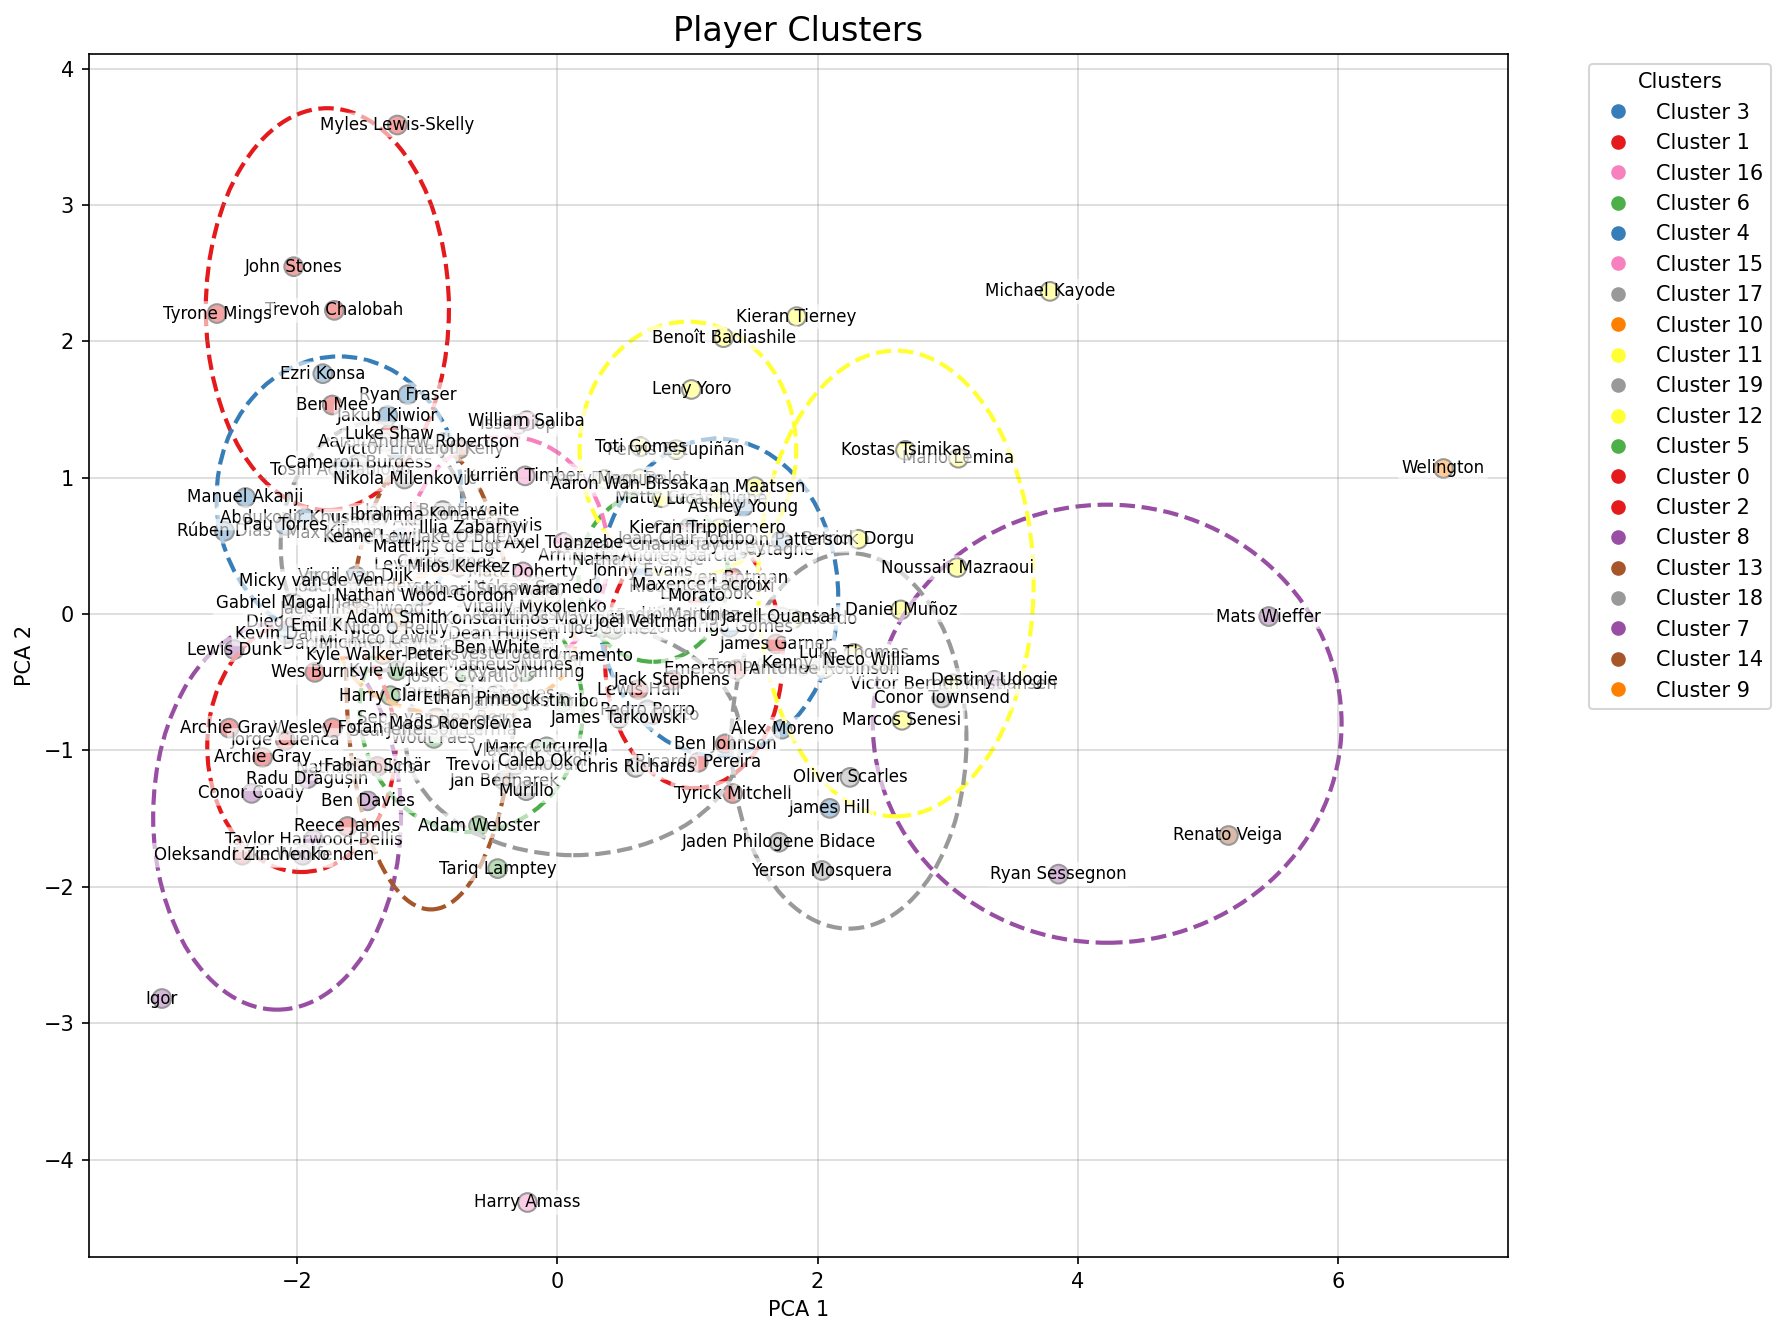

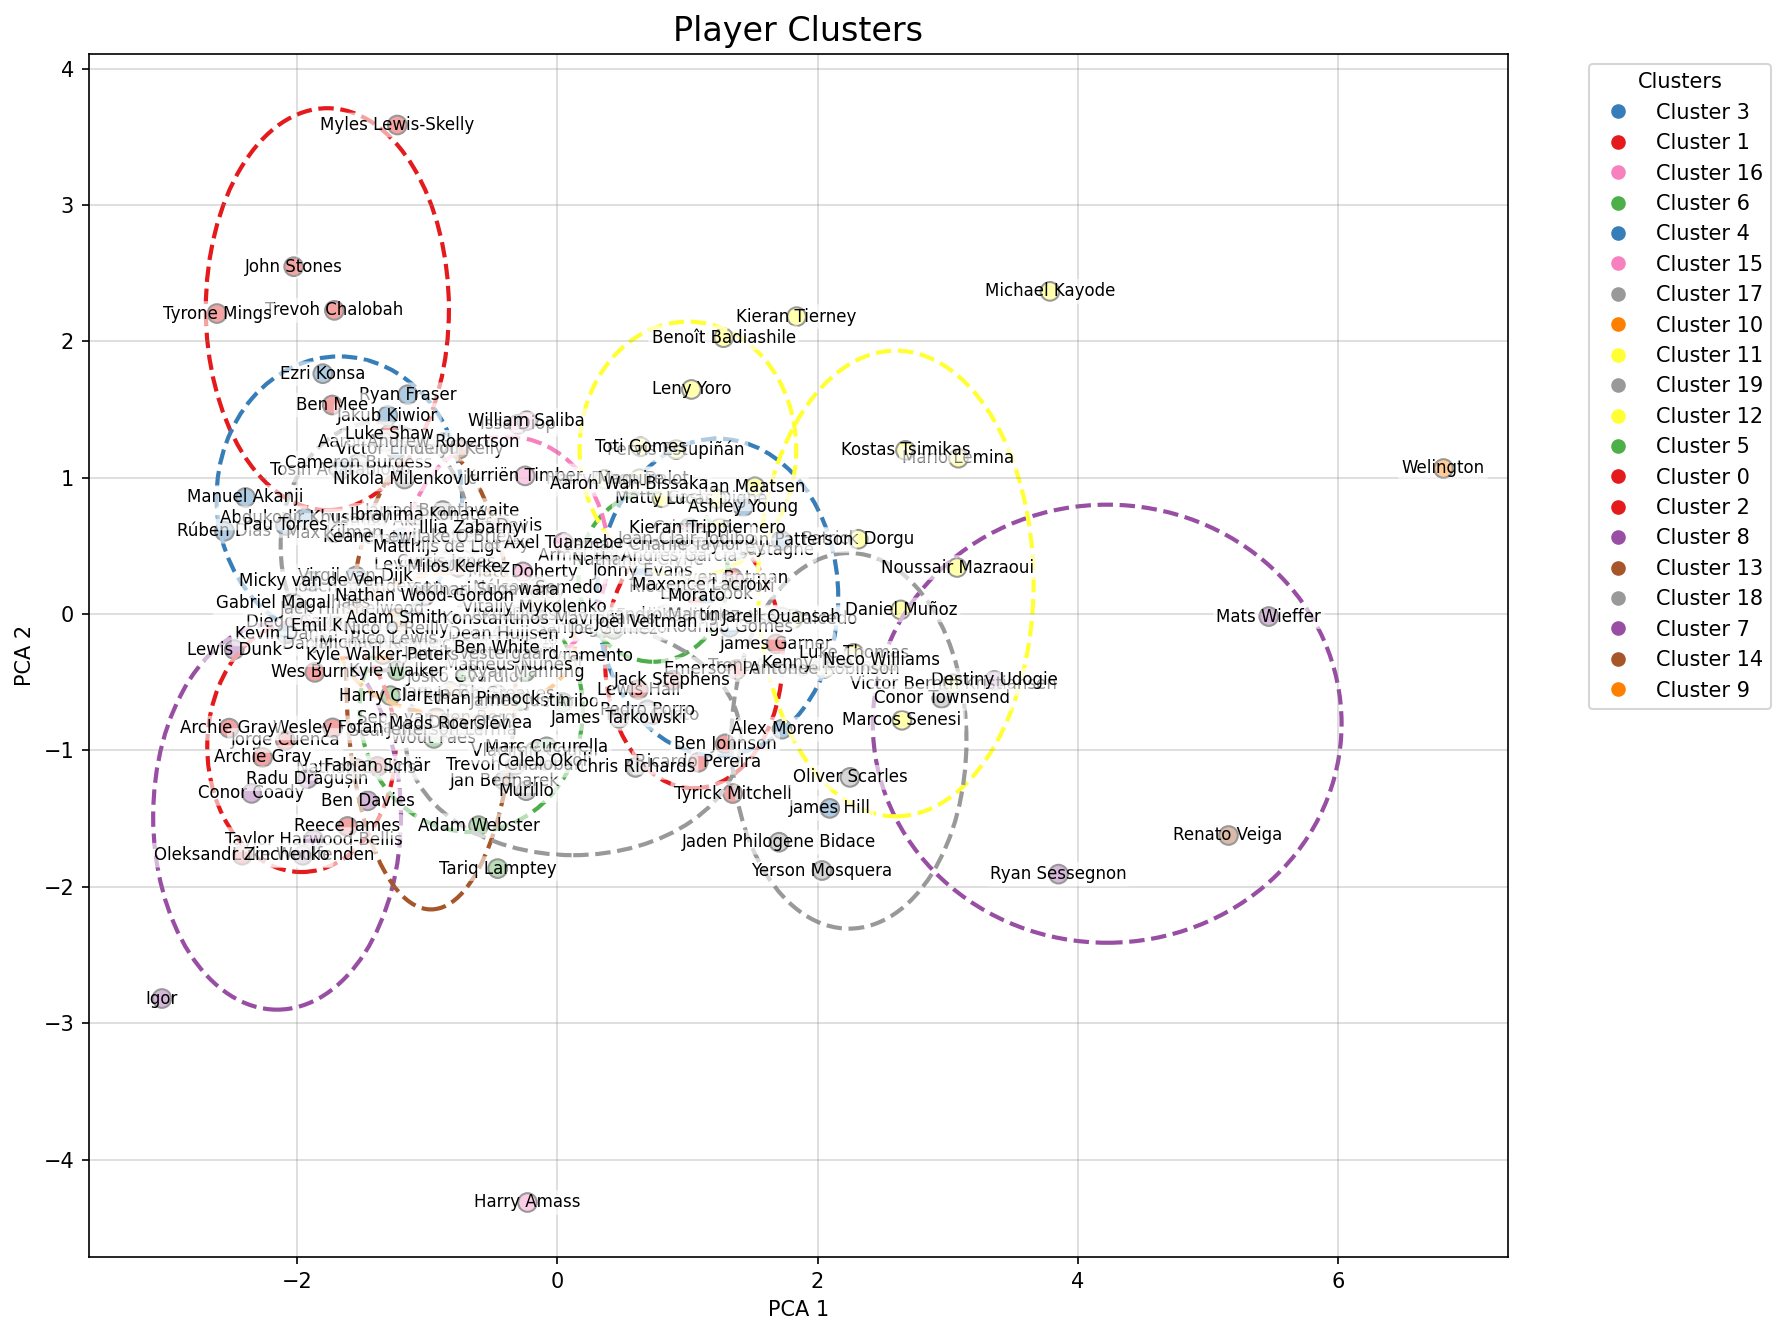

In [15]:
cluster_player_visual(defensive_player_features_pl,k=20,pos='DF',name=None)